In [9]:
import os,sys,torch
import pandas as pd

In [10]:
from videha.synthesizers import TwinSynthesizer,PrivateTwinSynthesizer

In [11]:
from videha.metrics import *
from videha.metrics.reports import *
from videha.metrics import compute_metrics
from videha.metrics.single_table import SingleTableMetric
from videha.metrics.single_table import *

In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [13]:
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

In [14]:
torch.cuda.is_available()

True

###### 

## Normal API: Non-privately differentiable synthesizer

In [15]:
data = pd.read_csv(r"F:\Users\Kaggle\Videha\examples\csv\adult.csv")

In [16]:
data.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [17]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [18]:
synth.fit(data=data,epochs=2,discrete_columns=discrete_columns)

Epoch: [0]  [  0/161]  eta: 0:00:21  loss_g: 2.0557 (2.0557)  loss_d: 0.0199 (0.0199)  loss: 2.0756 (2.0756)  time: 0.1307  data: 0.0000  max mem: 0
Epoch: [0]  [ 50/161]  eta: 0:00:06  loss_g: 1.5708 (1.8150)  loss_d: -0.5792 (-0.5329)  loss: 0.9937 (1.2820)  time: 0.0534  data: 0.0000  max mem: 0
Epoch: [0]  [100/161]  eta: 0:00:03  loss_g: 1.5334 (1.7166)  loss_d: -0.1319 (-0.3837)  loss: 1.5359 (1.3329)  time: 0.0521  data: 0.0000  max mem: 0
Epoch: [0]  [150/161]  eta: 0:00:00  loss_g: 1.3369 (1.5969)  loss_d: 0.0850 (-0.2217)  loss: 1.4005 (1.3752)  time: 0.0537  data: 0.0000  max mem: 0
Epoch: [0]  [161/161]  eta: 0:00:00  loss_g: 1.2277 (1.5699)  loss_d: 0.1289 (-0.1908)  loss: 1.4107 (1.3791)  time: 0.0552  data: 0.0000  max mem: 0
Epoch: [0] Total time: 0:00:08
Epoch: [1]  [  0/161]  eta: 0:00:08  loss_g: 0.9840 (0.9840)  loss_d: 0.4220 (0.4220)  loss: 1.4060 (1.4060)  time: 0.0537  data: 0.0000  max mem: 0
Epoch: [1]  [ 50/161]  eta: 0:00:06  loss_g: 0.7299 (0.9327)  loss_d:

In [19]:
sample = synth.sample(1000)

In [20]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

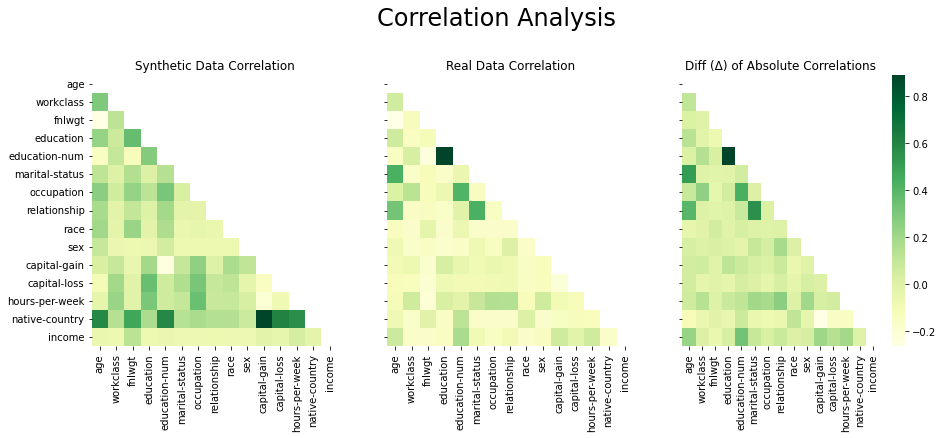

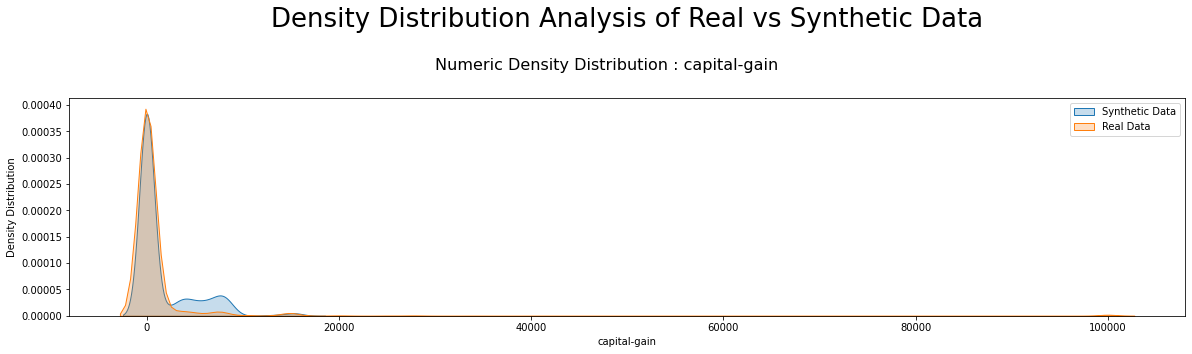

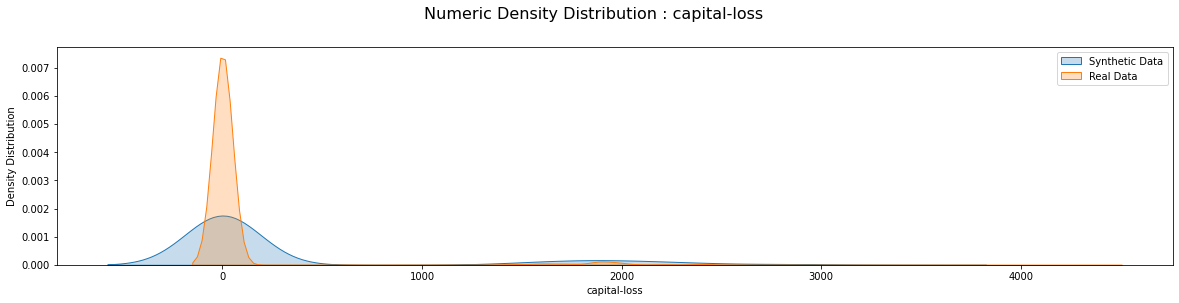

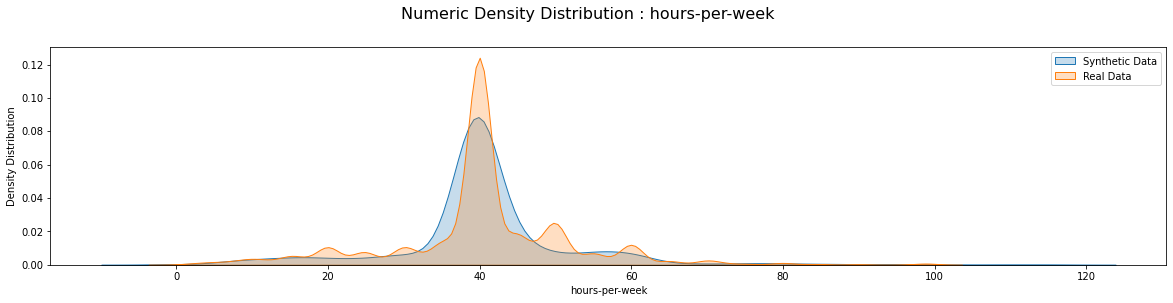

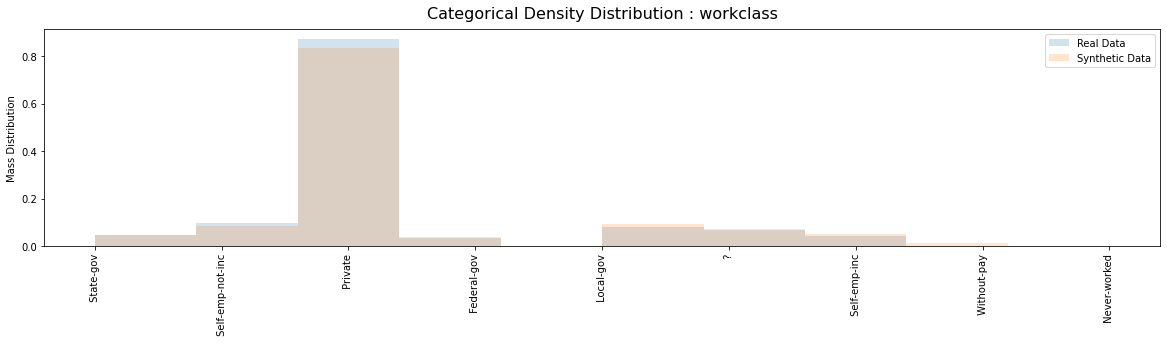

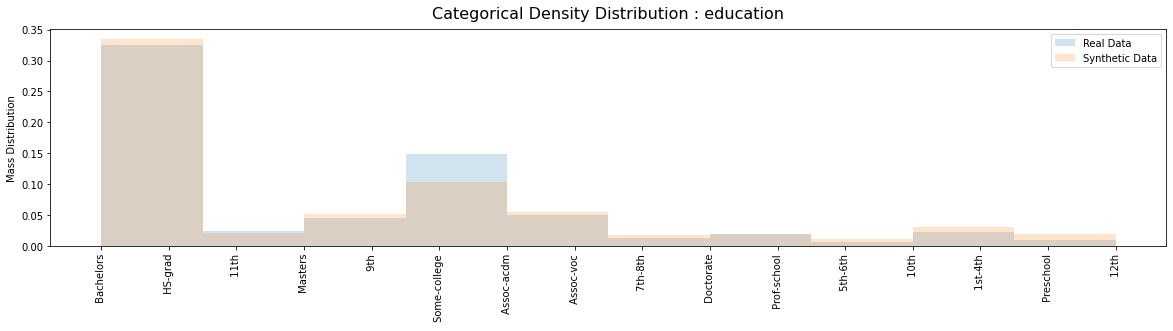

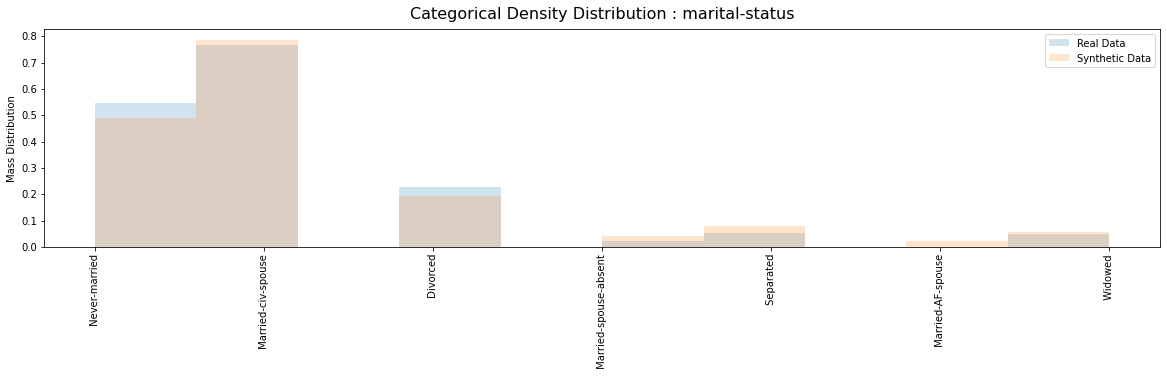

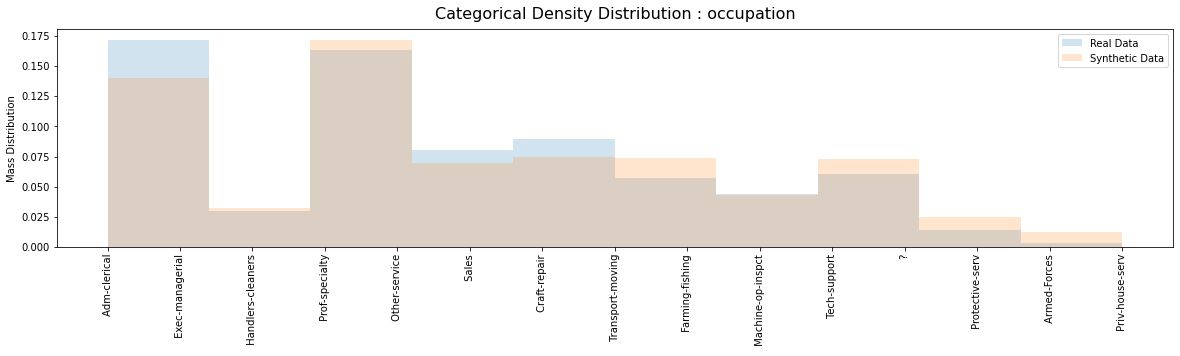

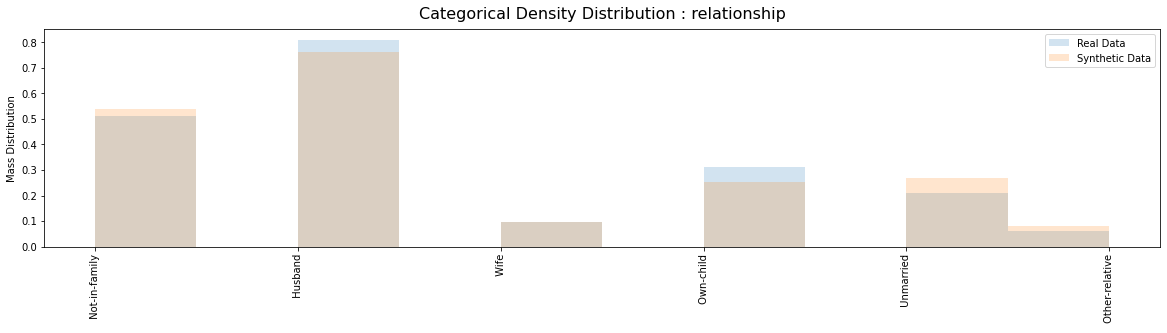

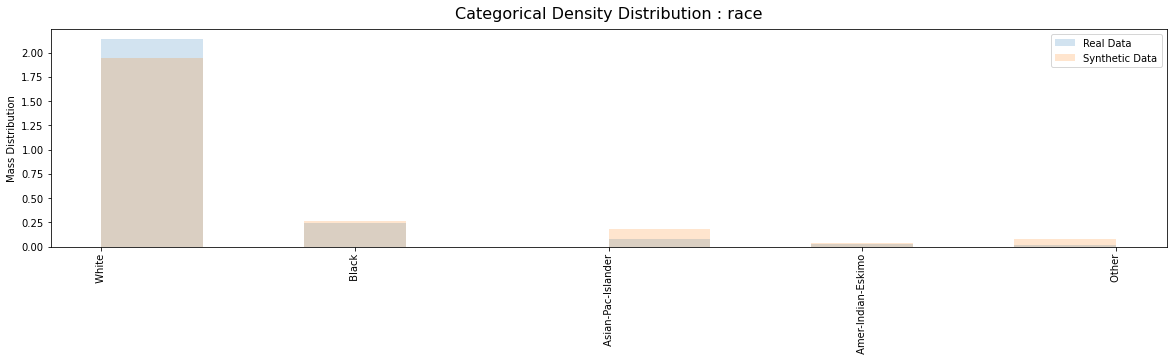

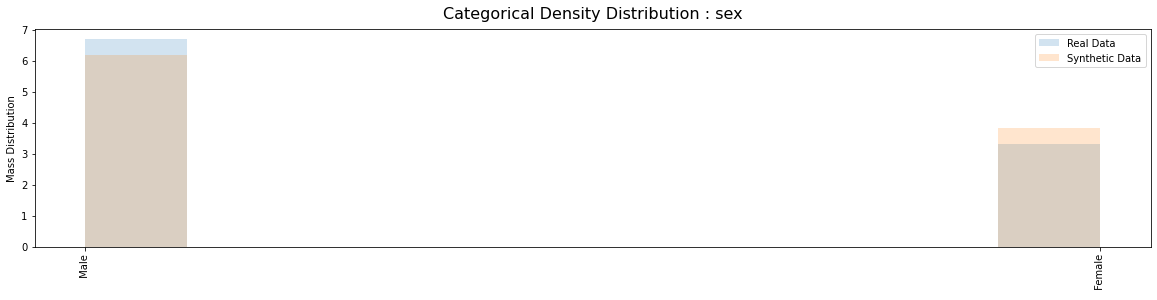

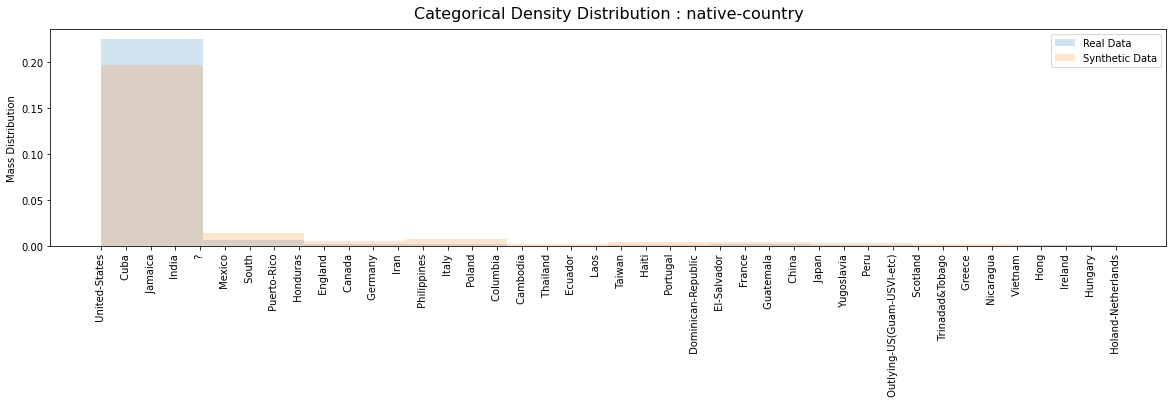

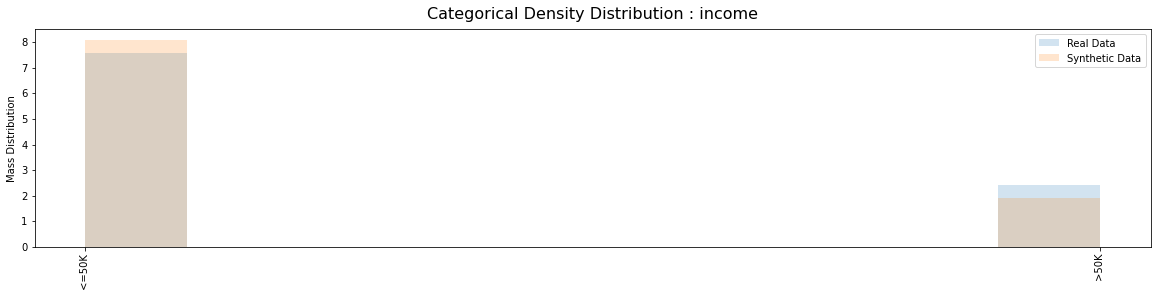

In [21]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

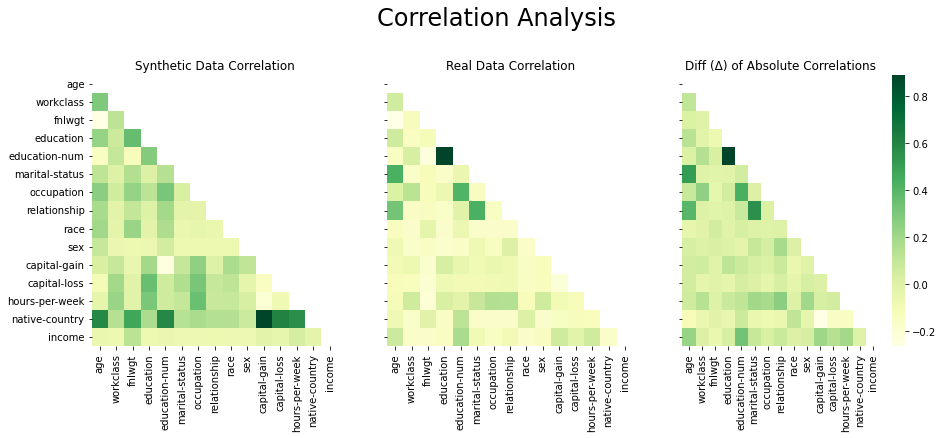

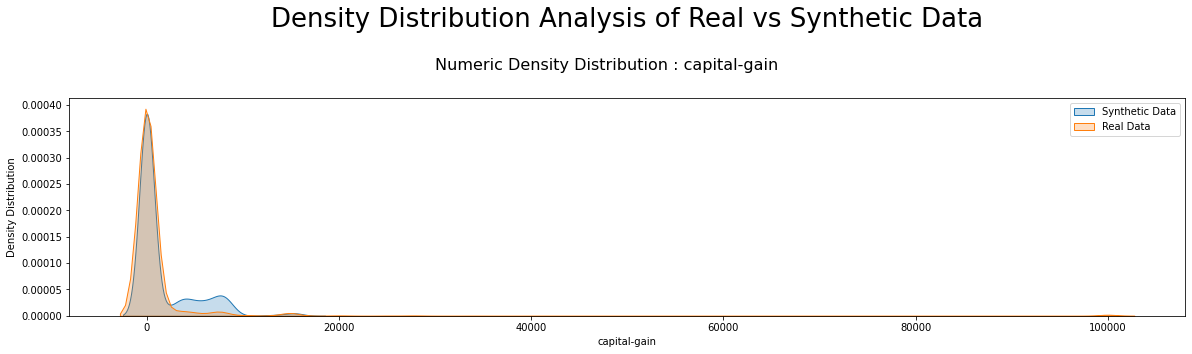

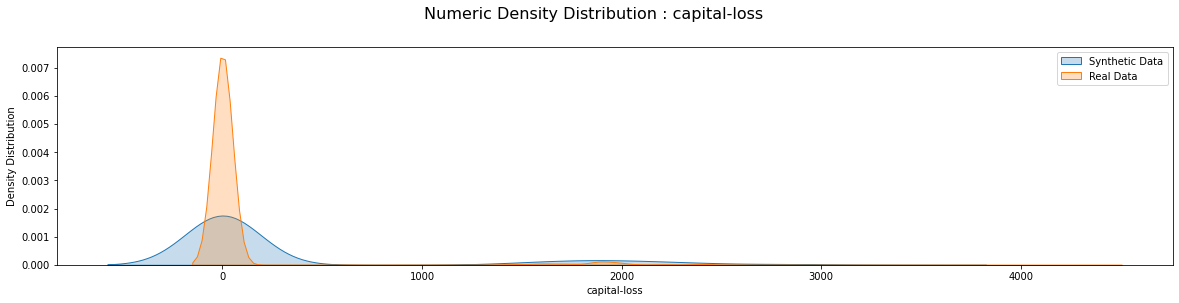

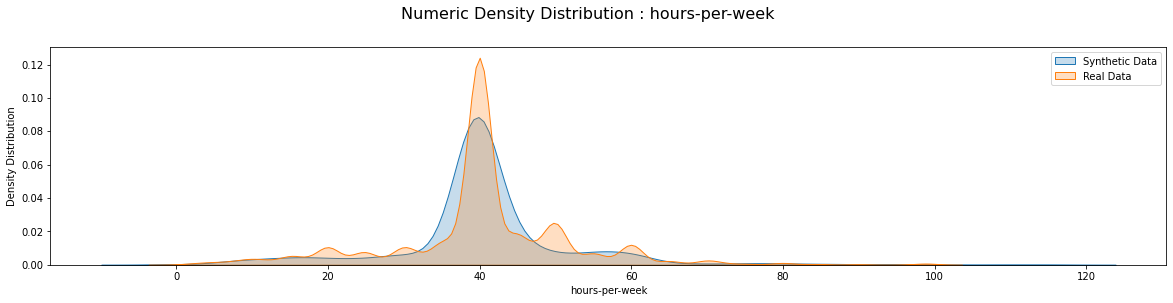

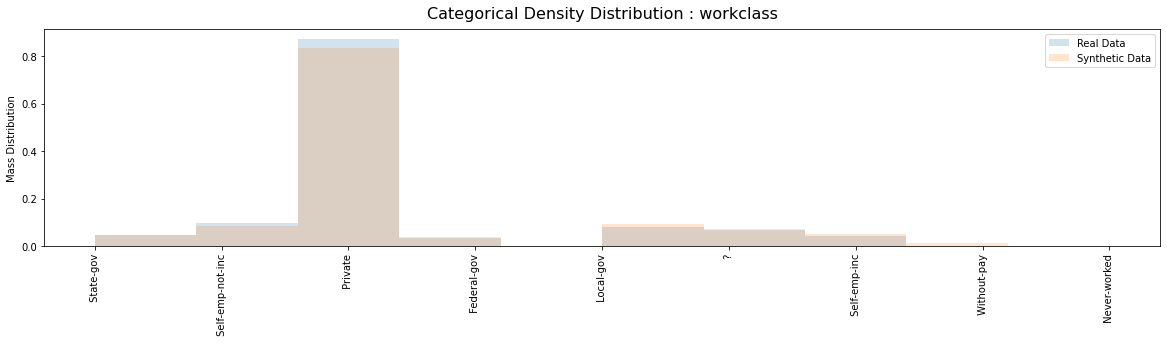

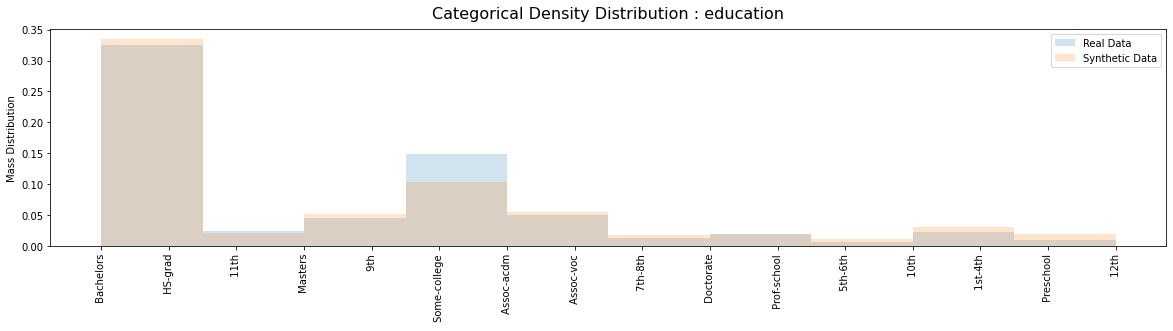

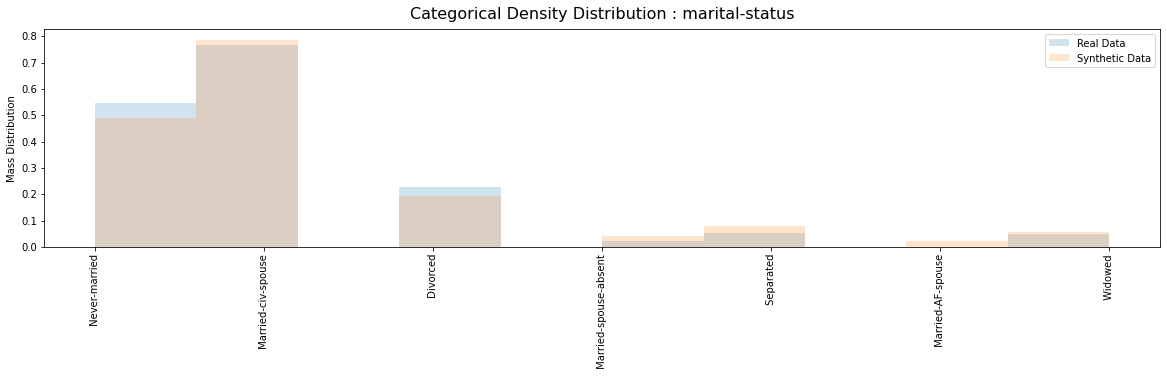

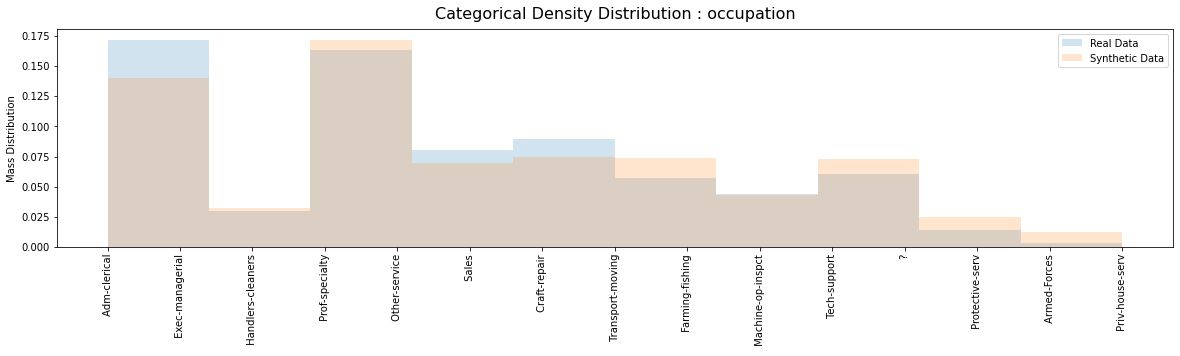

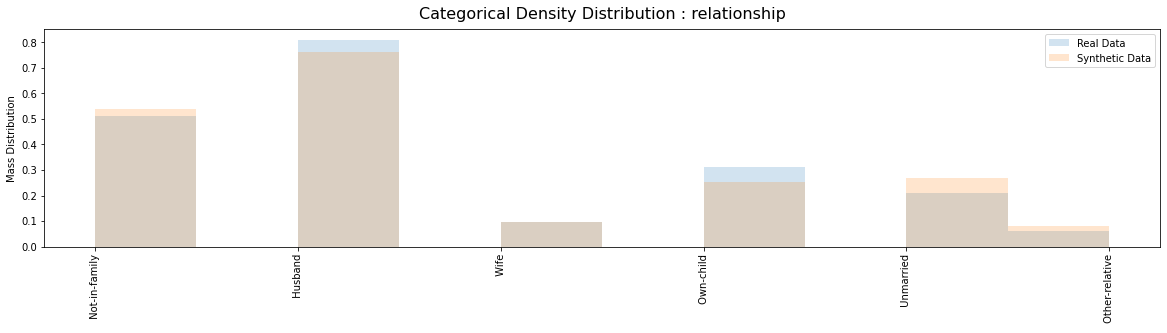

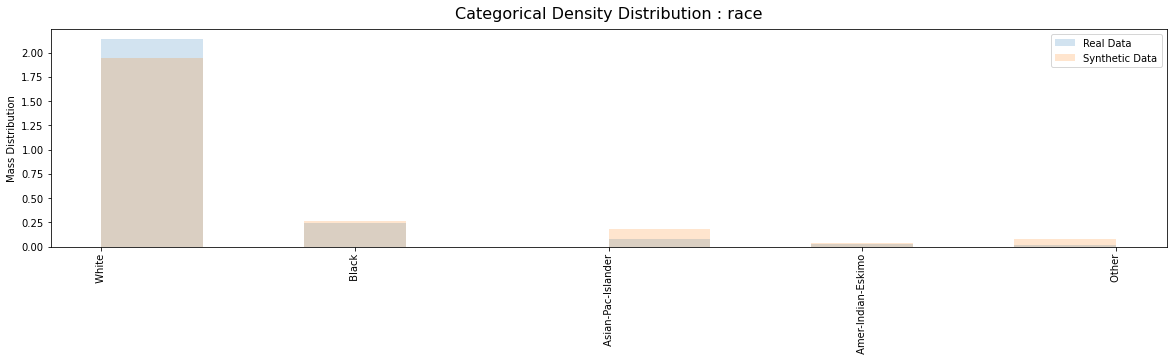

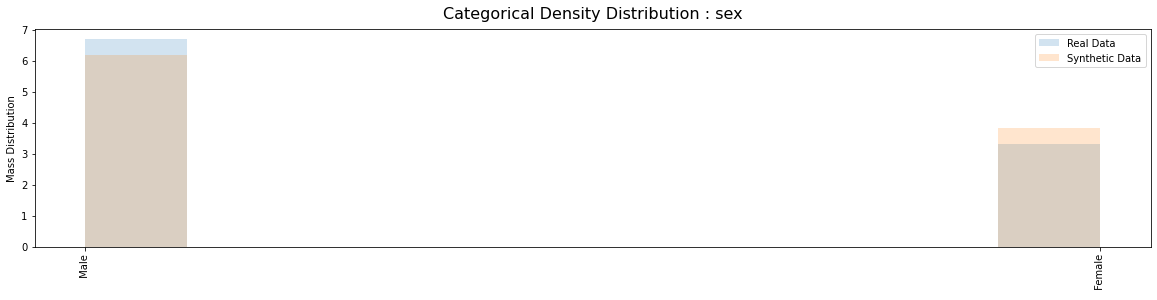

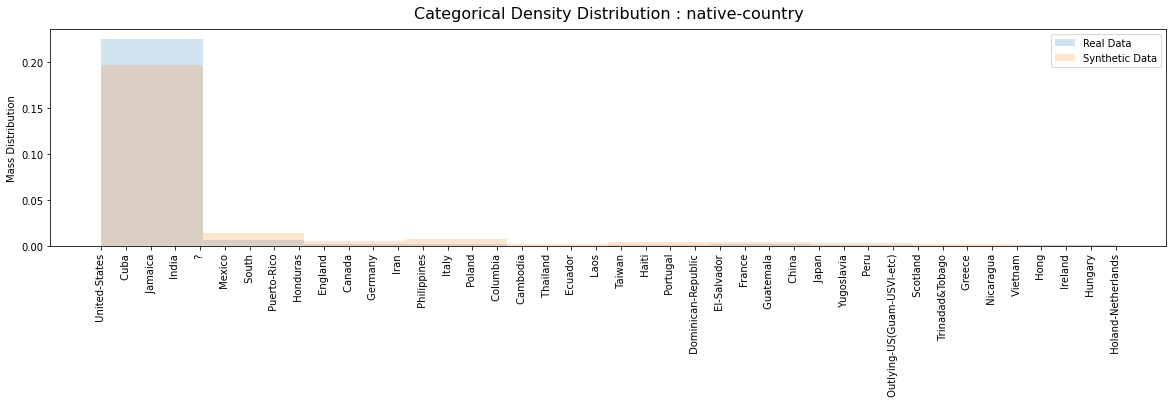

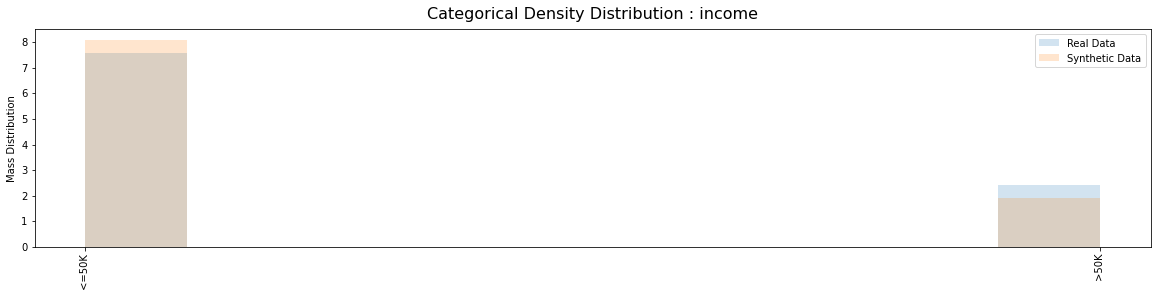

In [22]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

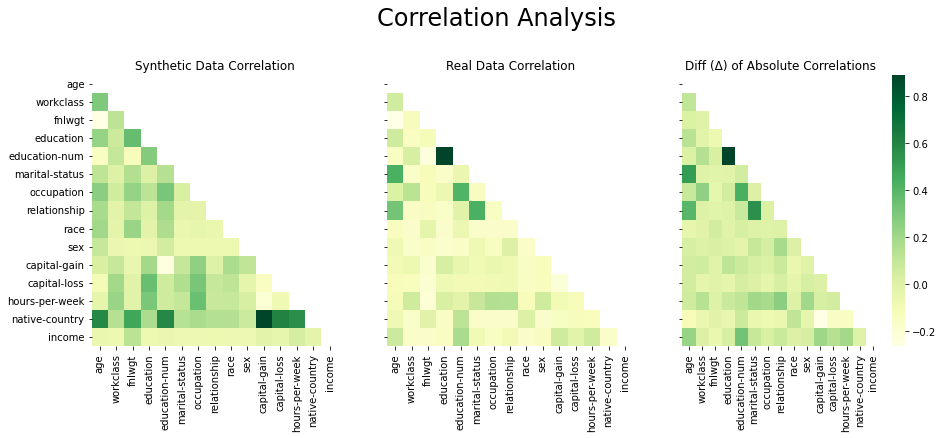

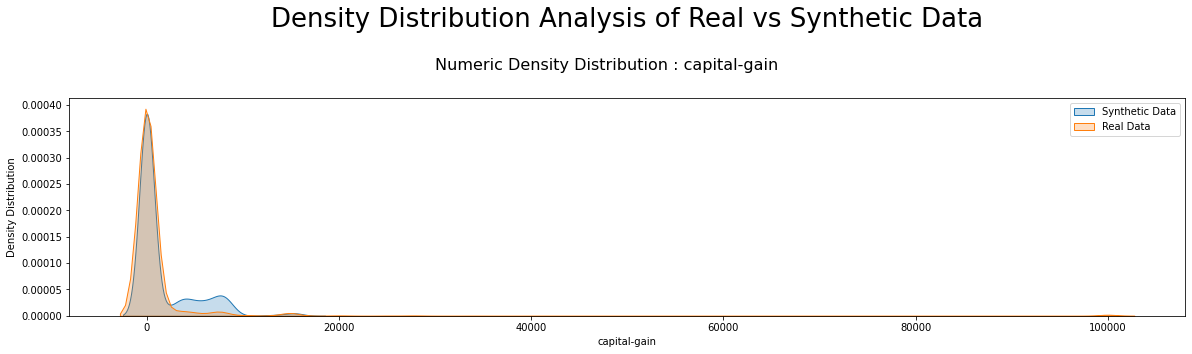

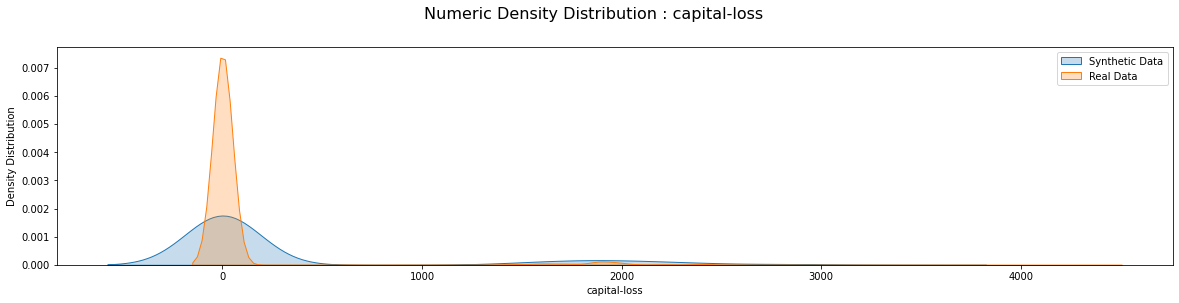

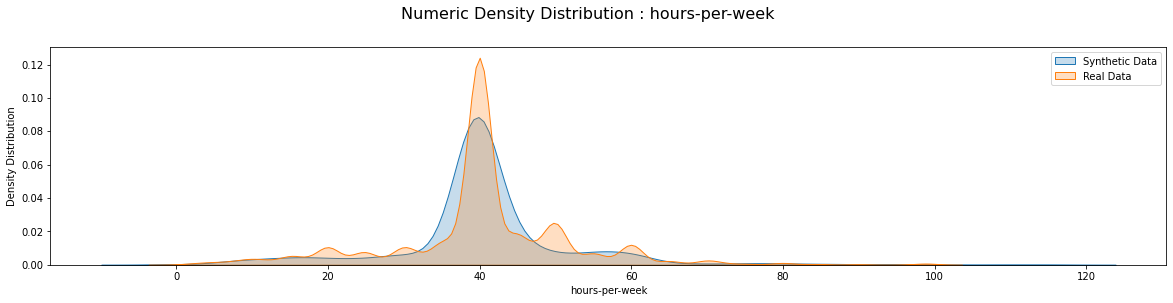

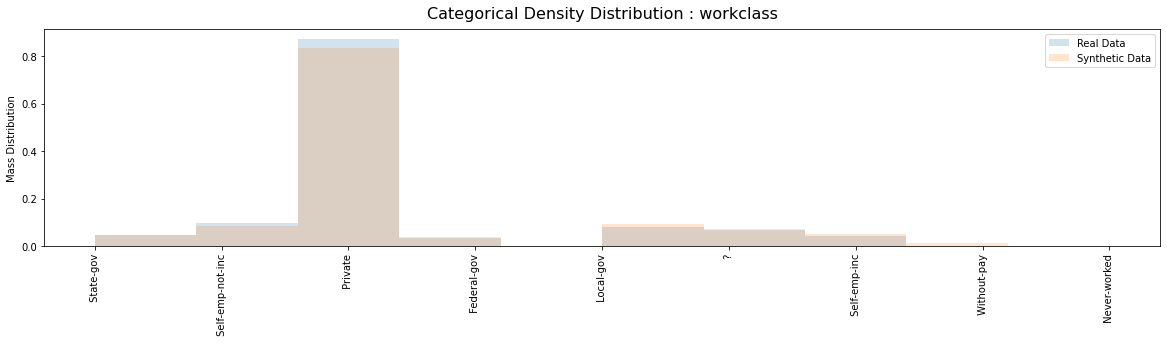

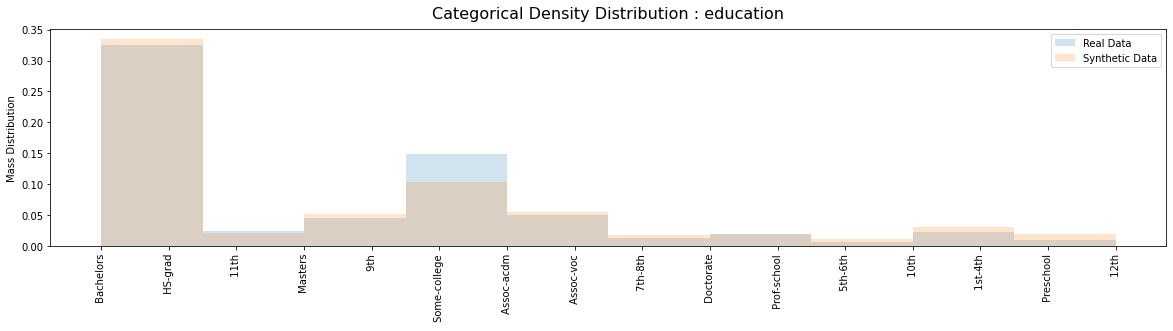

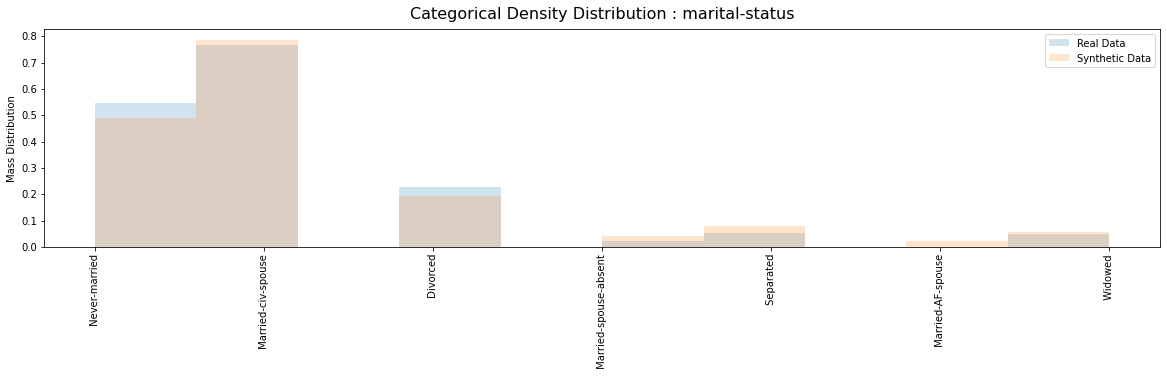

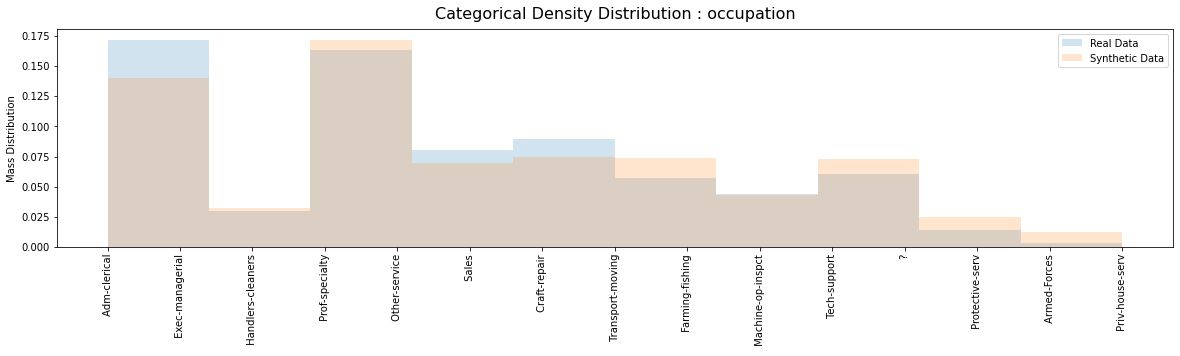

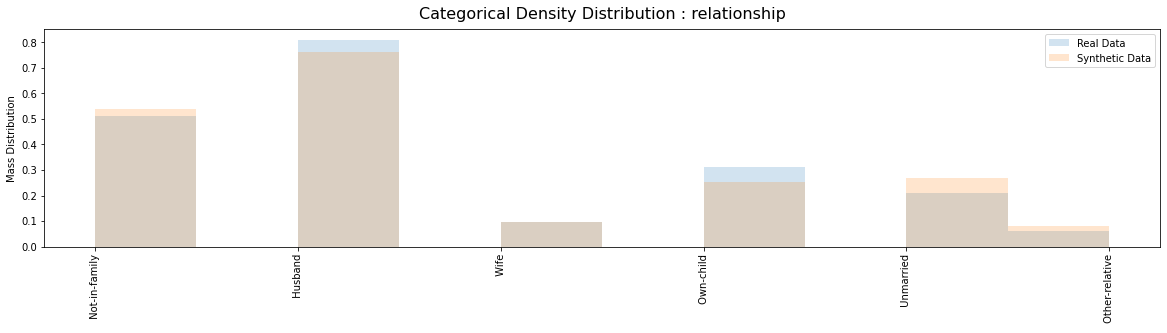

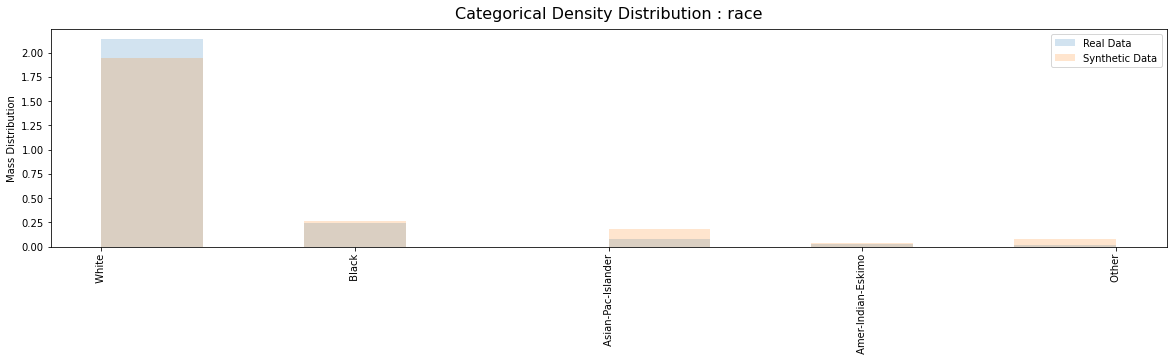

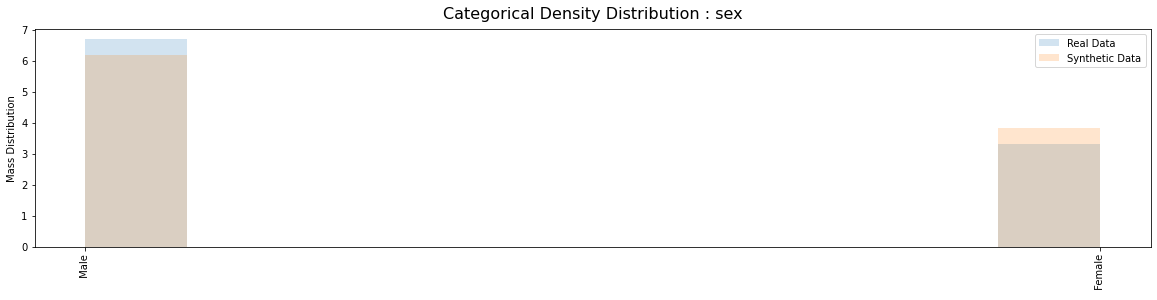

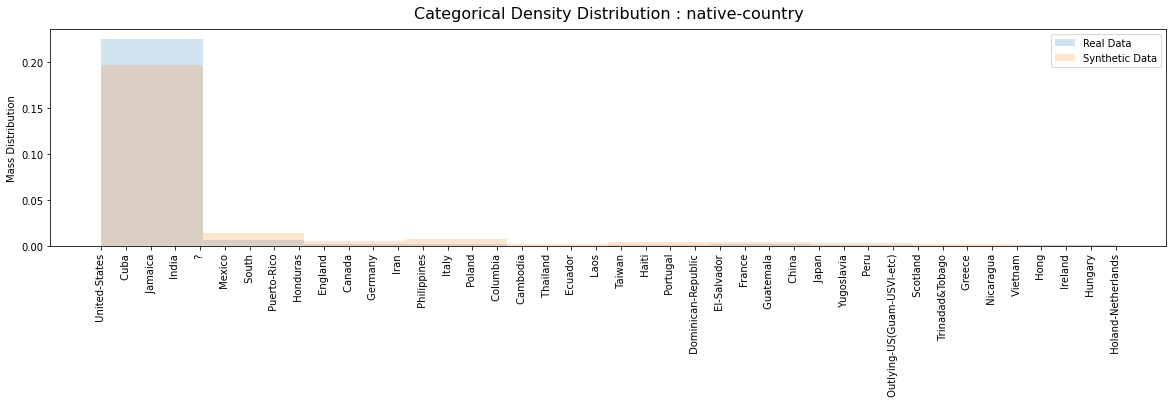

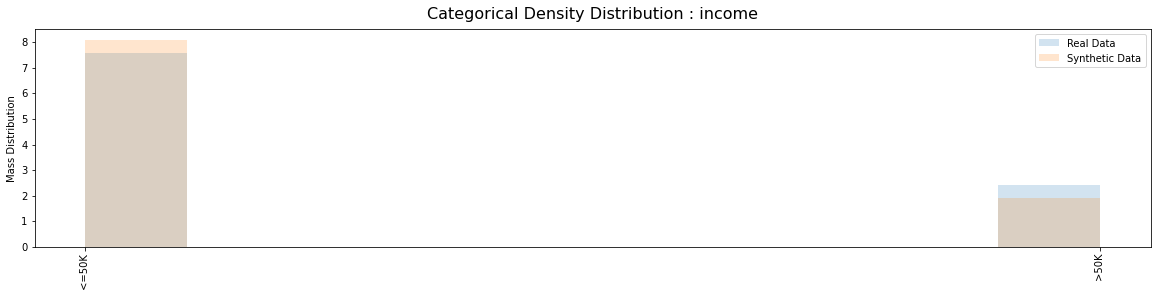

In [23]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [25]:
synth.save('F:/Users/Kaggle/wids/NormalAPI.pth')

#### 

## Adversarial API: Non-privately differentiable synthesizer

In [26]:
synth = TwinSynthesizer(batch_size=200,device='cpu')   ### cpu else cuda

In [27]:
synth.fit_adversarial(data=data,epochs=2,discrete_columns=discrete_columns,test_pct=0.33)

Generating train and test splits ...
TRAIN SAMPLES: n=21815
TEST SAMPLES: n=10746
Epoch: [0]  [  0/108]  eta: 0:00:06  loss_g: 2.2097 (2.2097)  loss_d: 0.0046 (0.0046)  loss: 2.2144 (2.2144)  time: 0.0574  data: 0.0000  max mem: 0
Epoch: [0]  [ 50/108]  eta: 0:00:03  loss_g: 1.7613 (1.9363)  loss_d: -0.7787 (-0.5969)  loss: 0.9821 (1.3395)  time: 0.0666  data: 0.0000  max mem: 0
Epoch: [0]  [100/108]  eta: 0:00:00  loss_g: 1.8145 (1.8498)  loss_d: -0.1251 (-0.4208)  loss: 1.6819 (1.4290)  time: 0.0630  data: 0.0000  max mem: 0
Epoch: [0]  [108/108]  eta: 0:00:00  loss_g: 1.8142 (1.8446)  loss_d: 0.0725 (-0.3797)  loss: 1.8088 (1.4649)  time: 0.0591  data: 0.0000  max mem: 0
Epoch: [0] Total time: 0:00:06
Epoch: [1]  [  0/108]  eta: 0:00:06  loss_g: 1.8160 (1.8160)  loss_d: 0.3067 (0.3067)  loss: 2.1227 (2.1227)  time: 0.0597  data: 0.0000  max mem: 0
Epoch: [1]  [ 50/108]  eta: 0:00:03  loss_g: 1.7233 (1.7885)  loss_d: 0.0969 (0.1402)  loss: 1.8434 (1.9287)  time: 0.0566  data: 0.0000 

In [28]:
sample = synth.sample_adversarial(data,1000)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [29]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

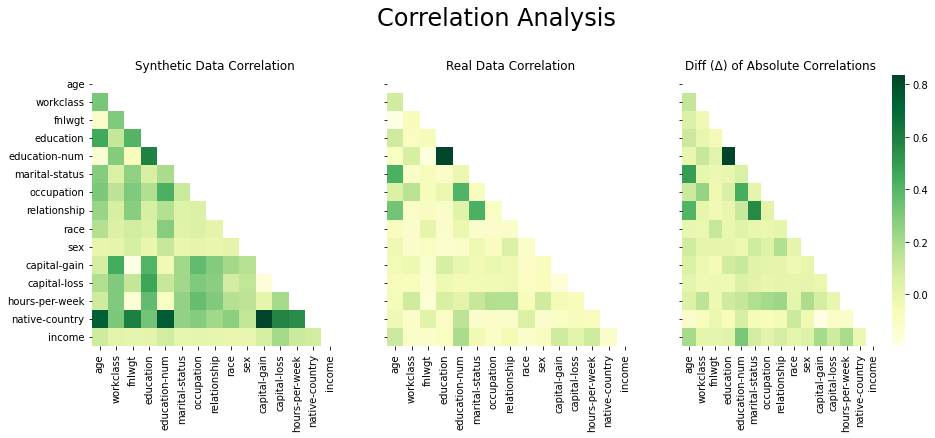

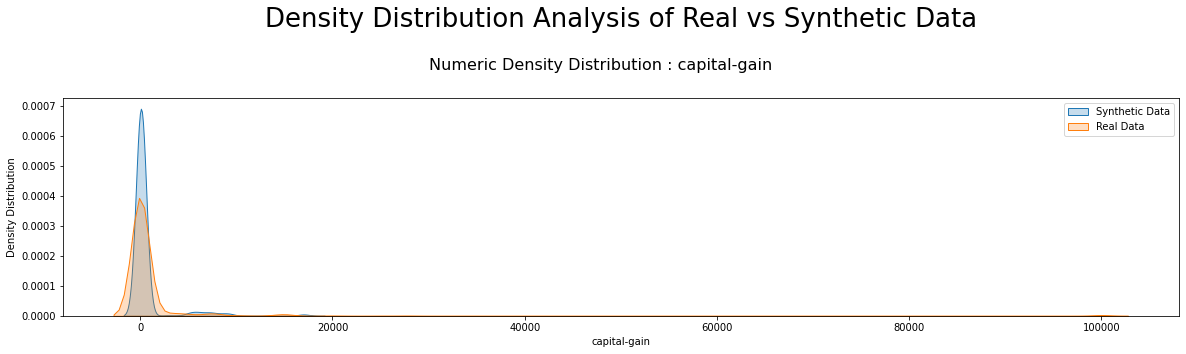

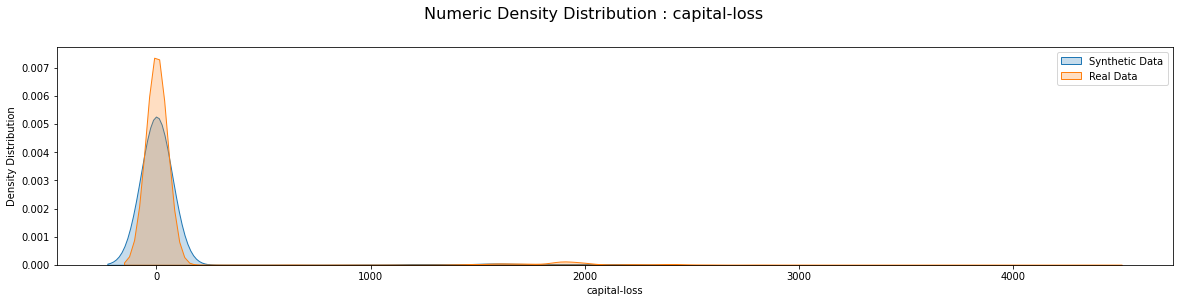

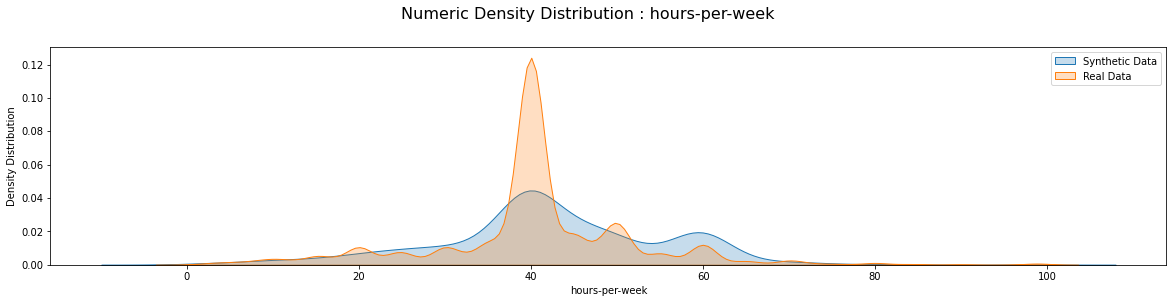

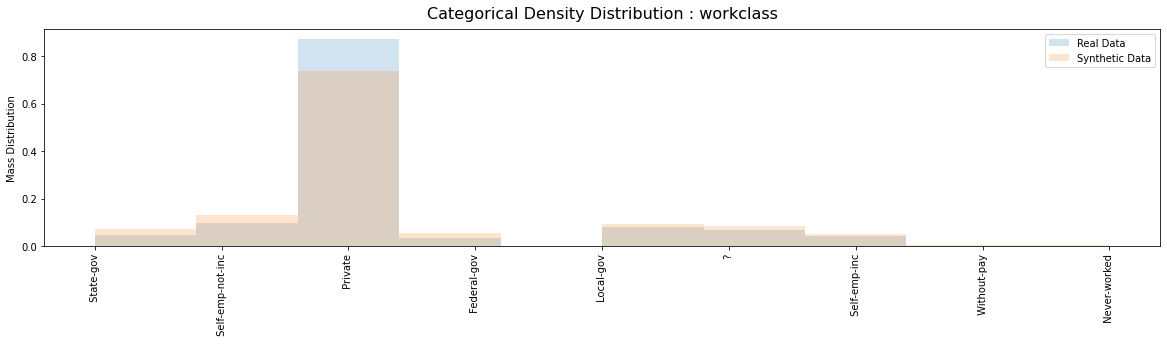

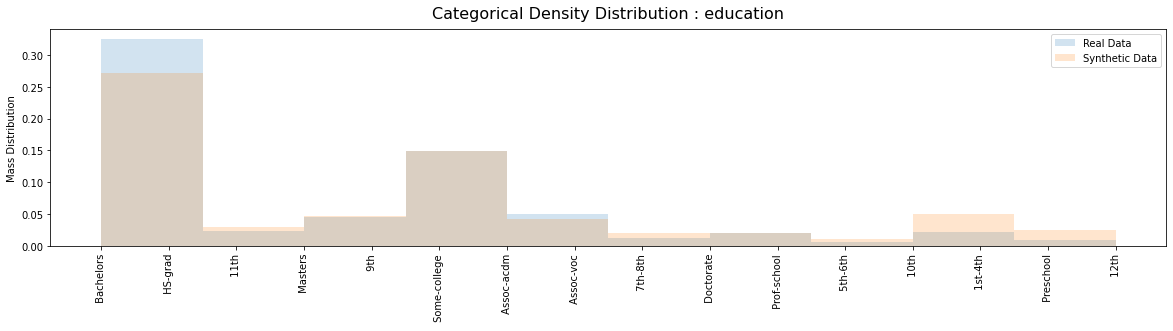

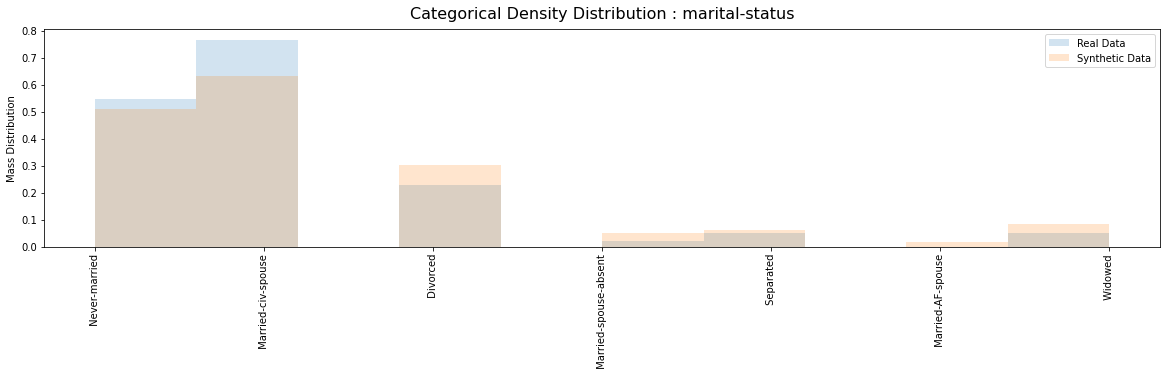

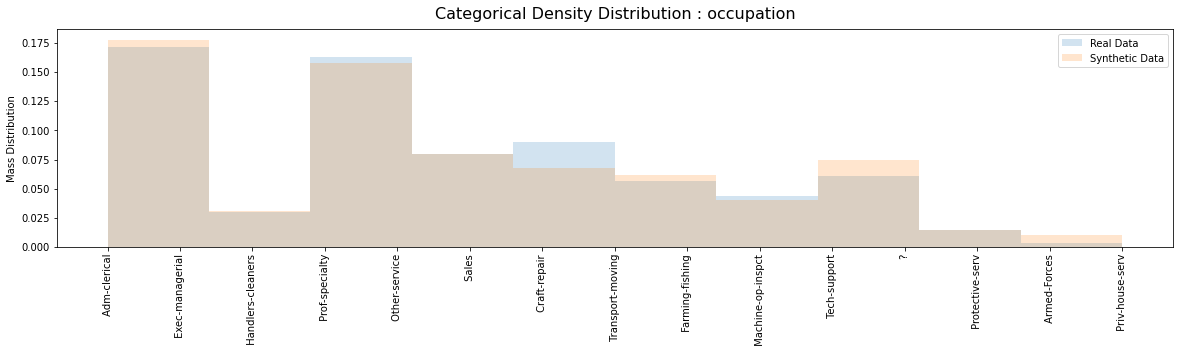

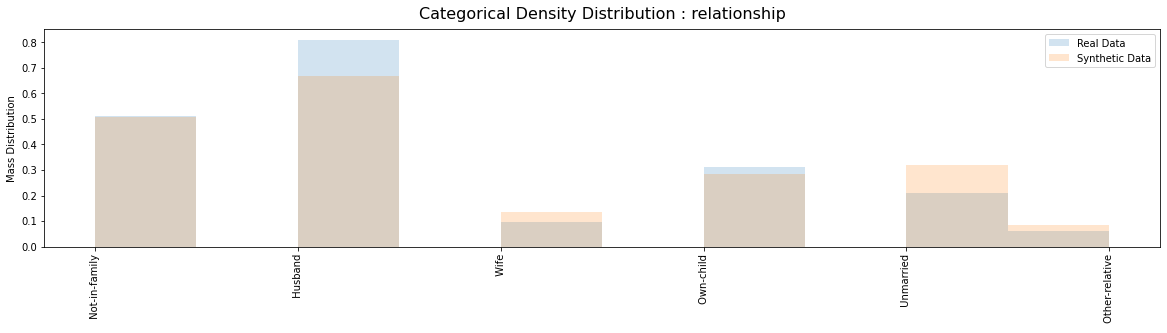

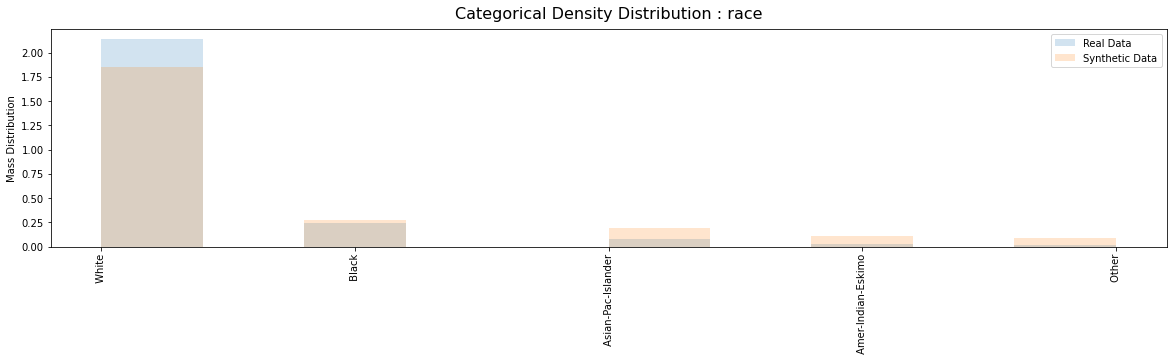

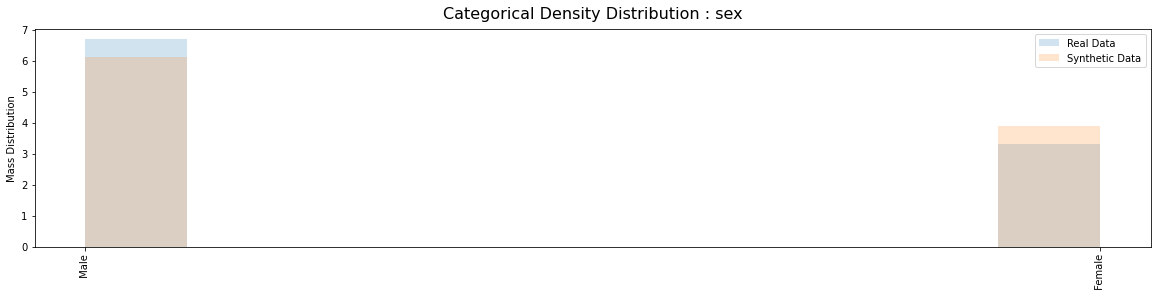

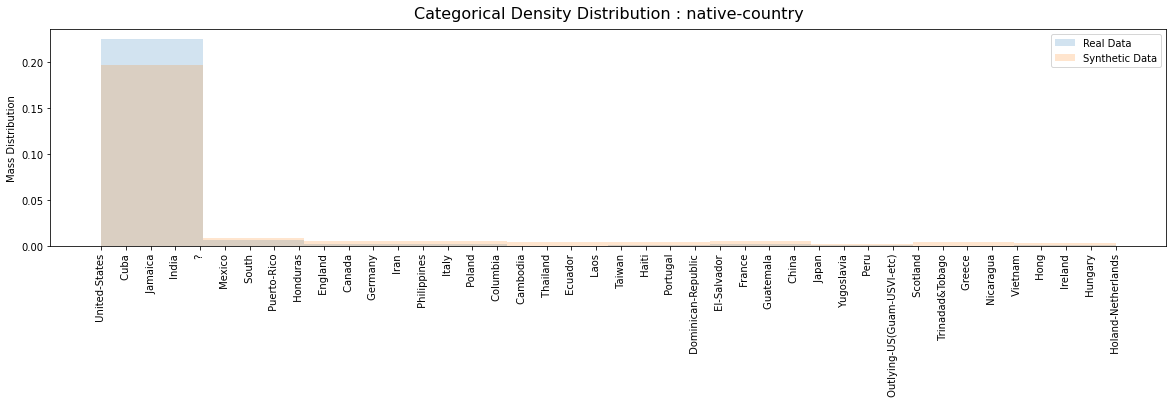

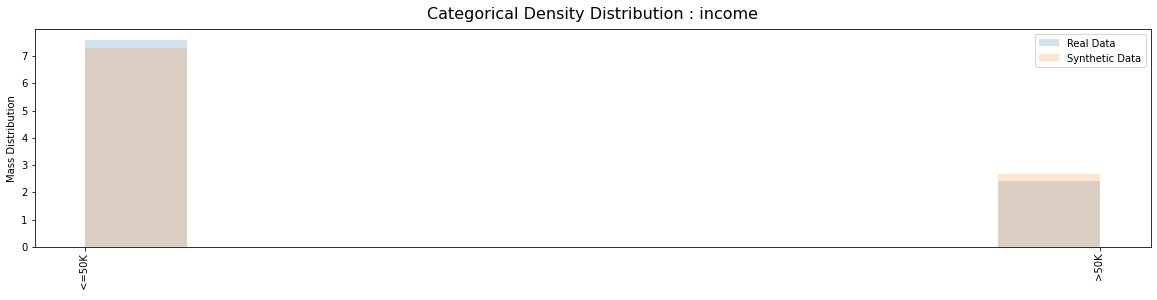

In [30]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

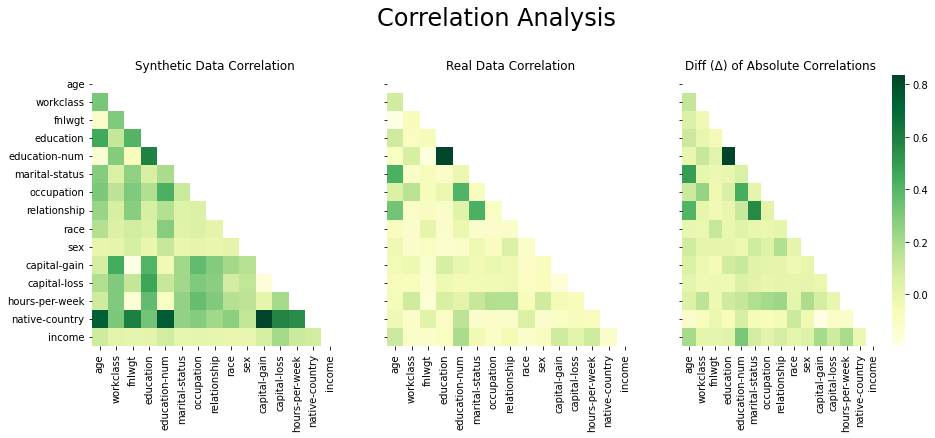

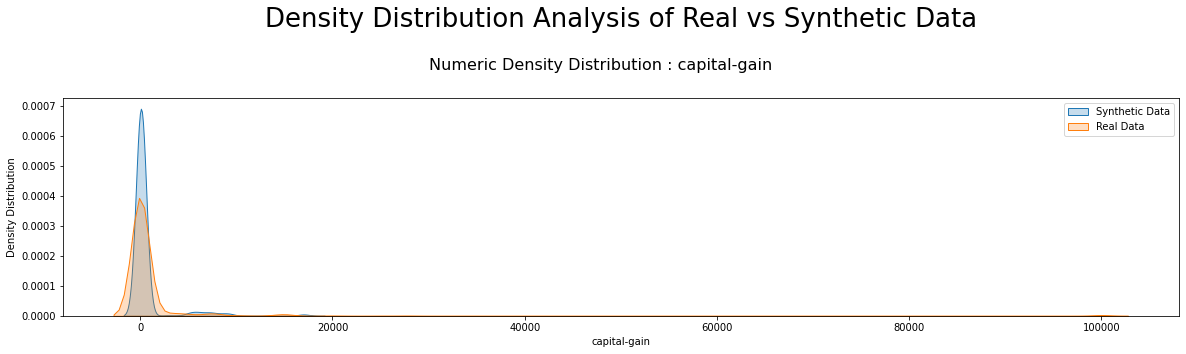

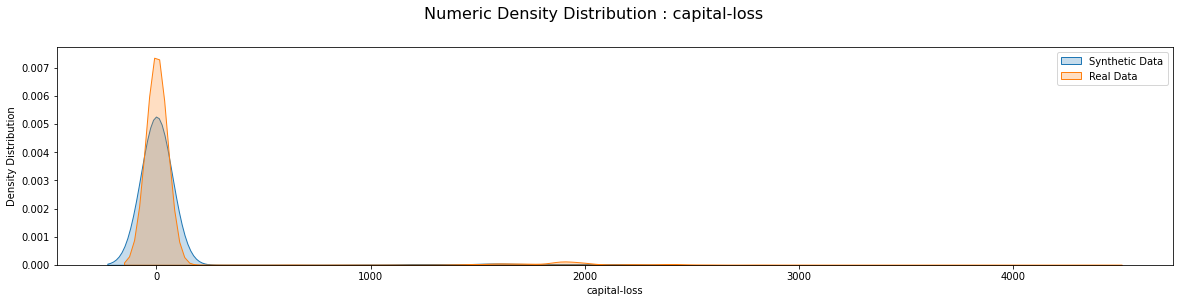

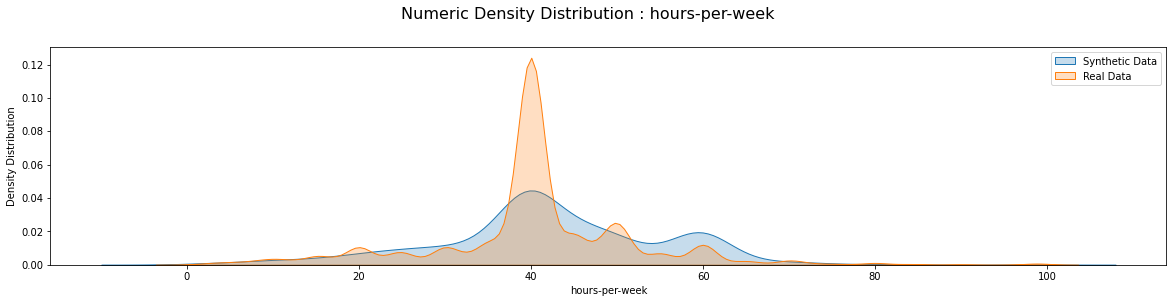

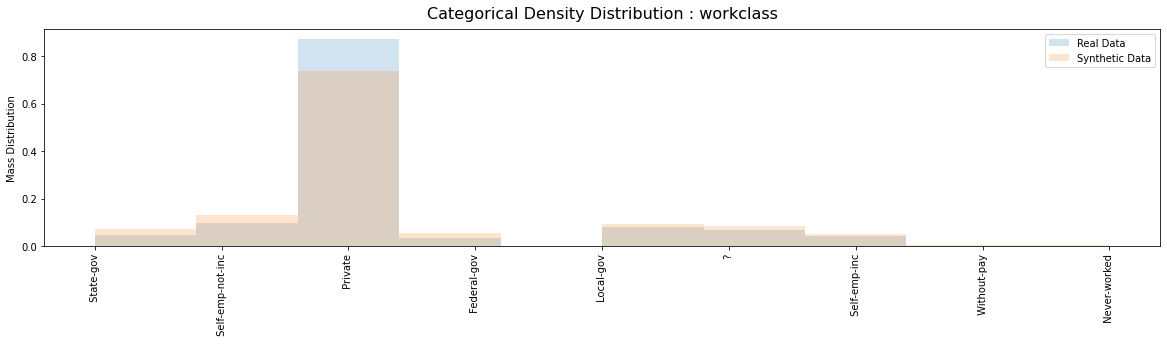

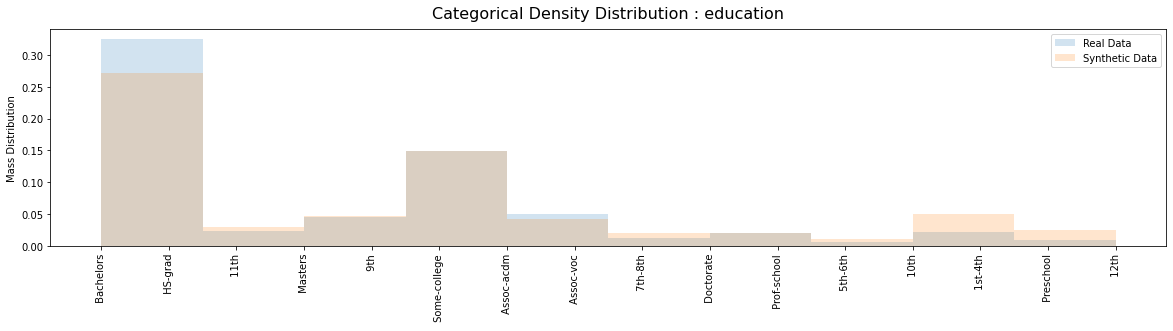

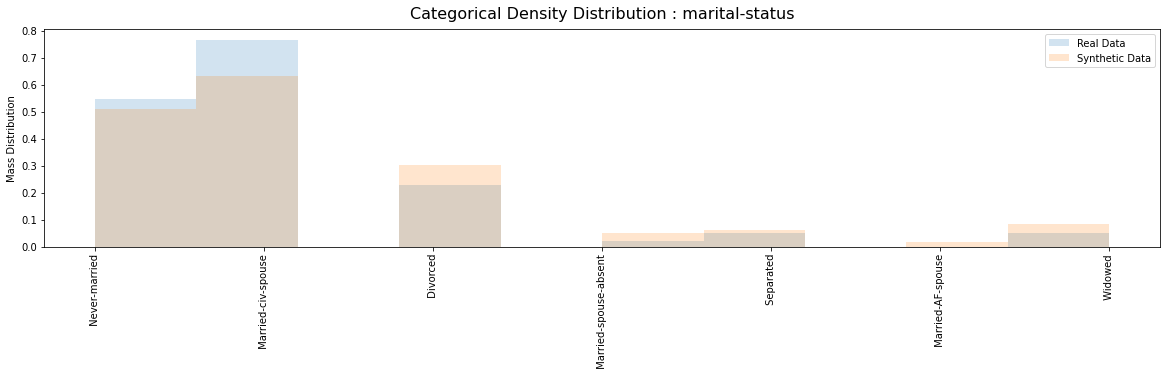

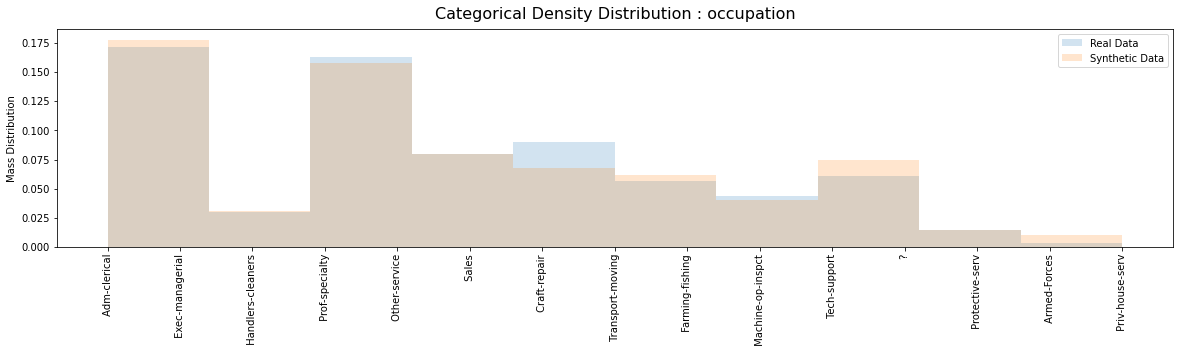

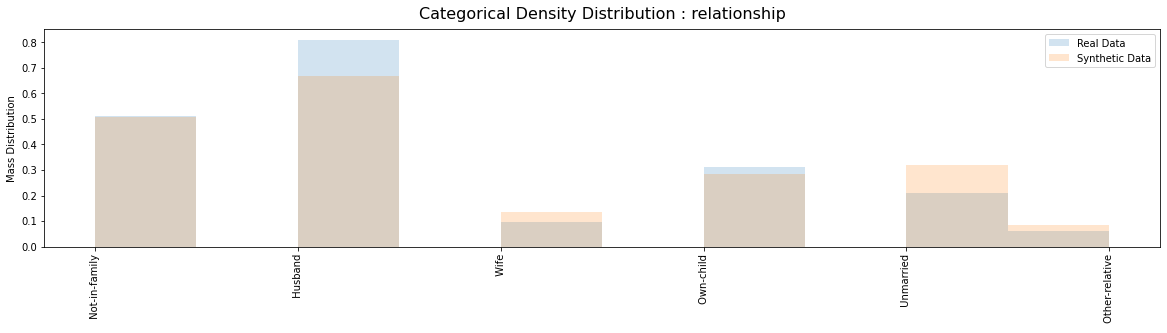

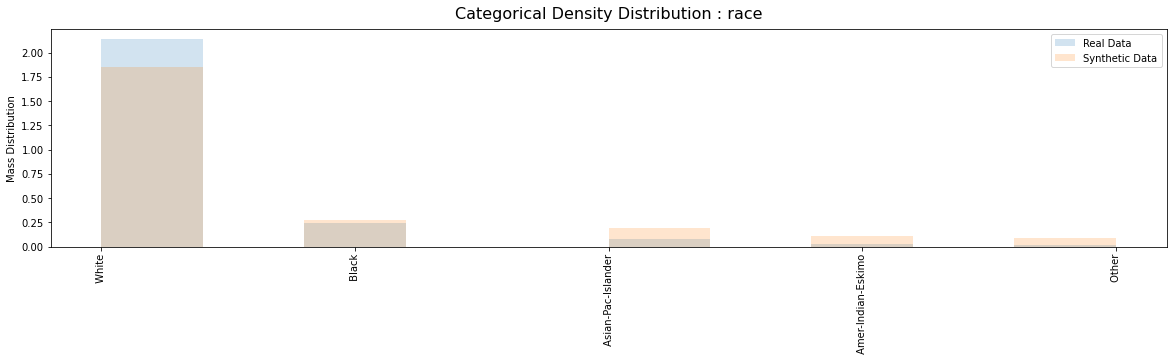

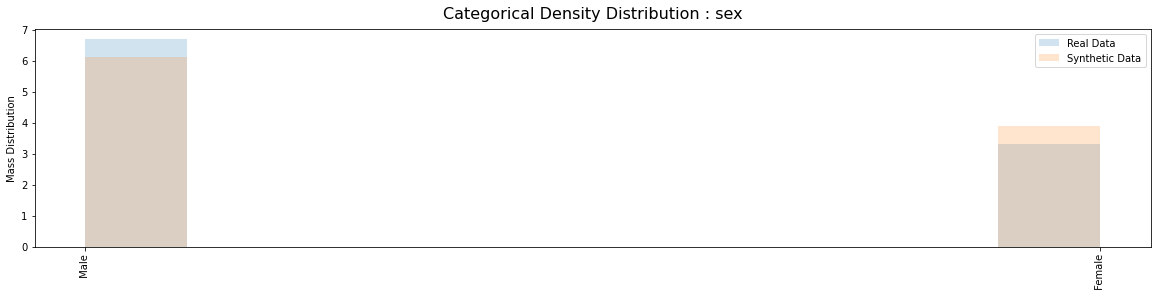

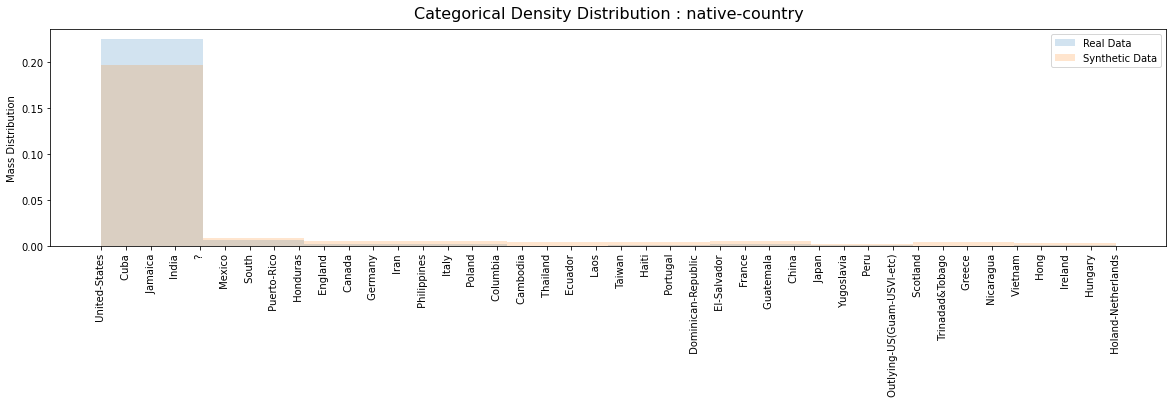

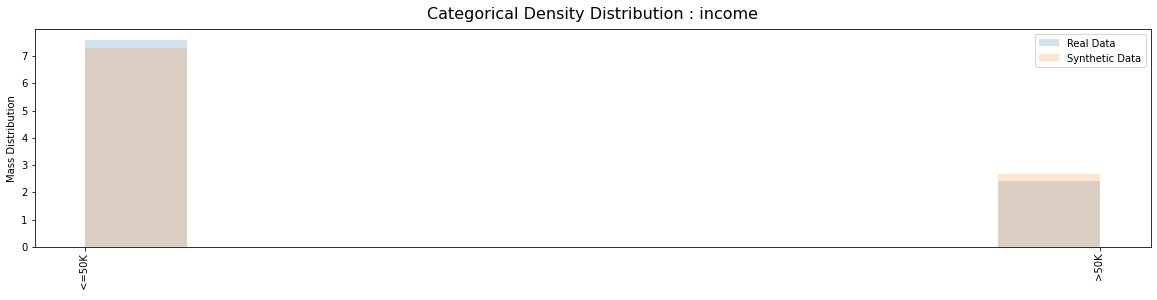

In [31]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

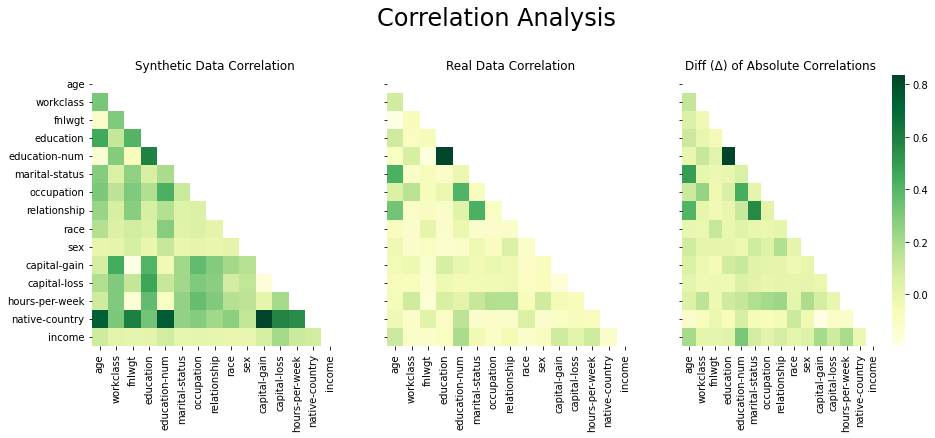

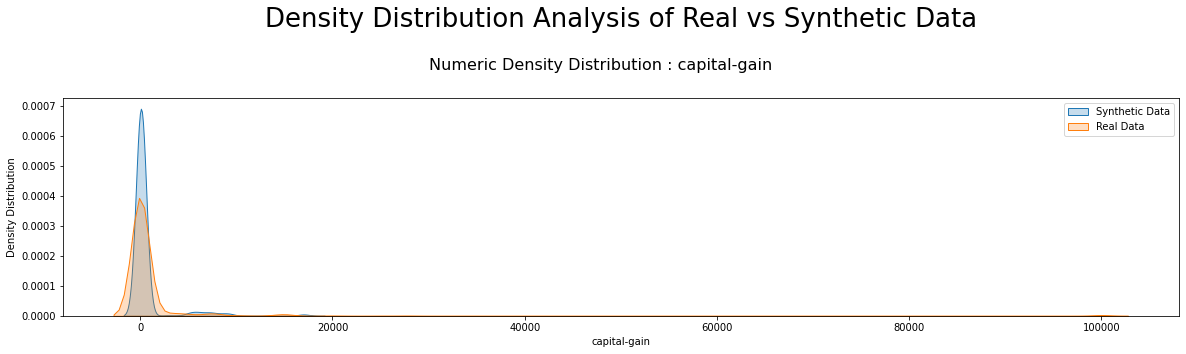

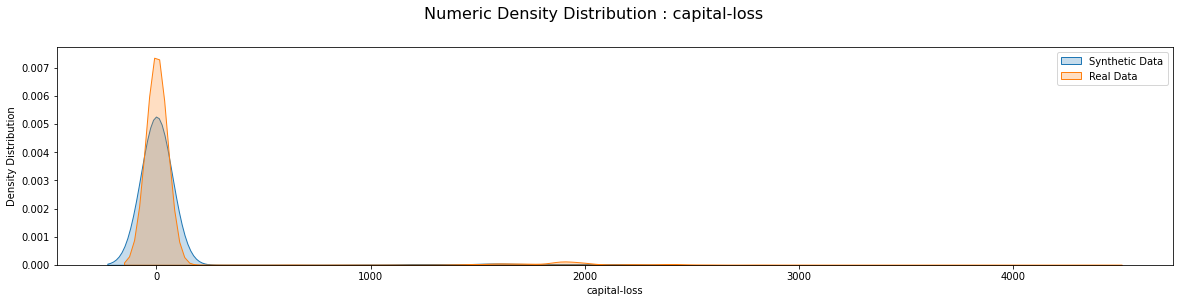

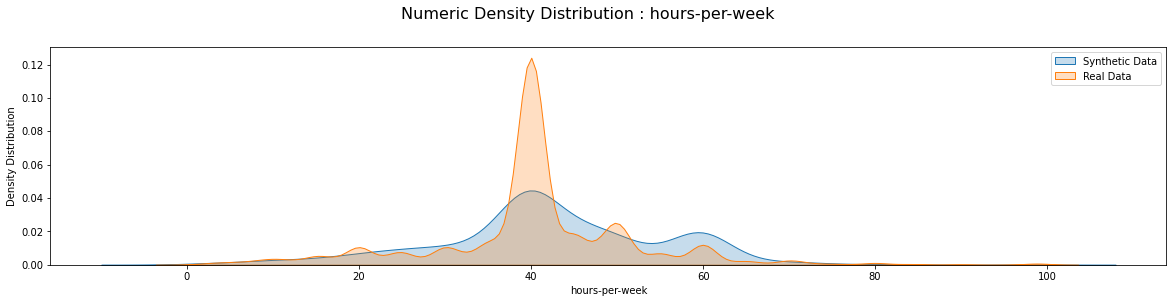

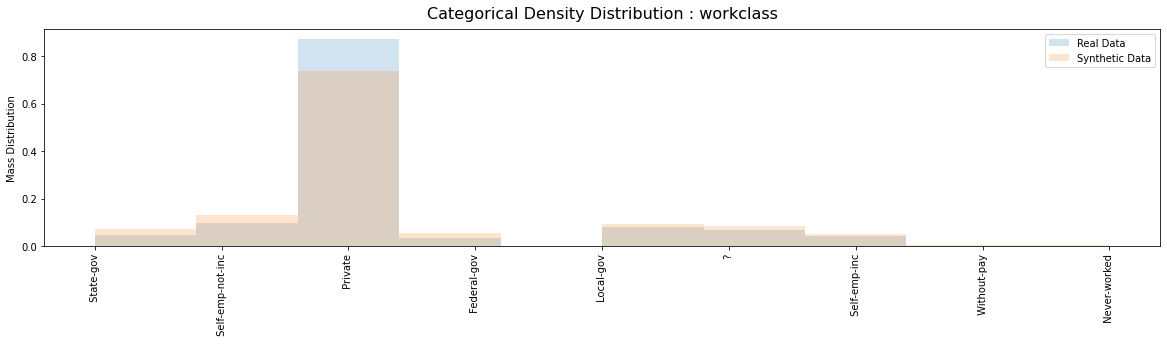

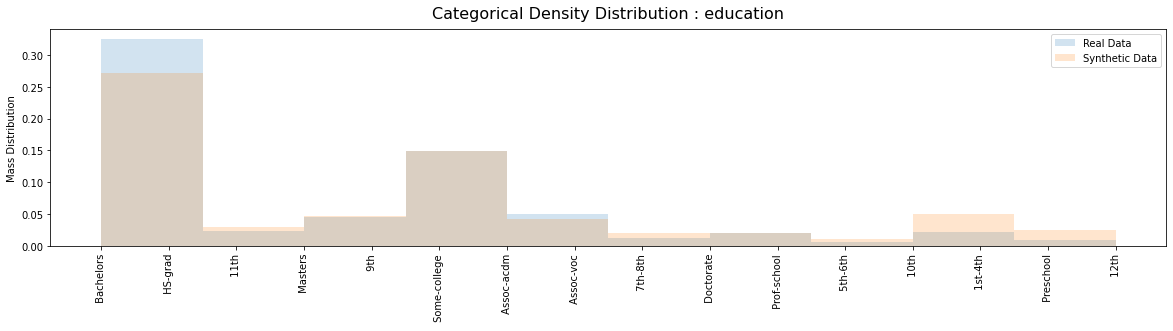

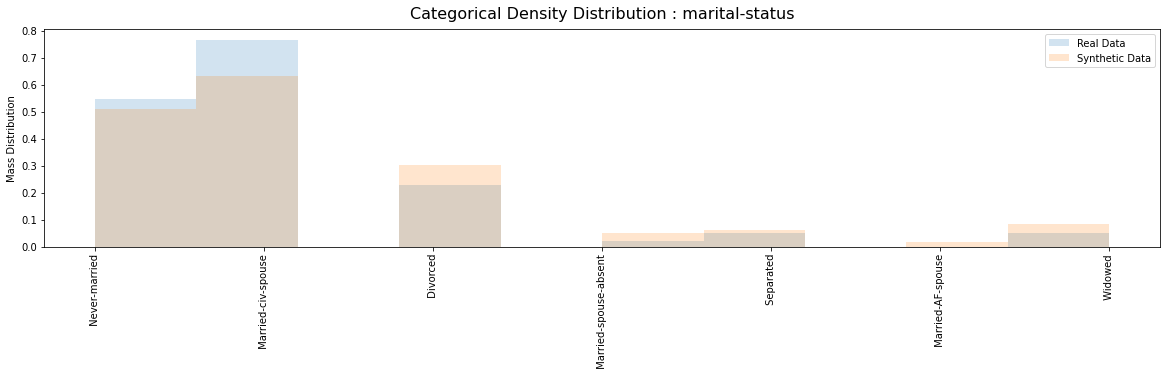

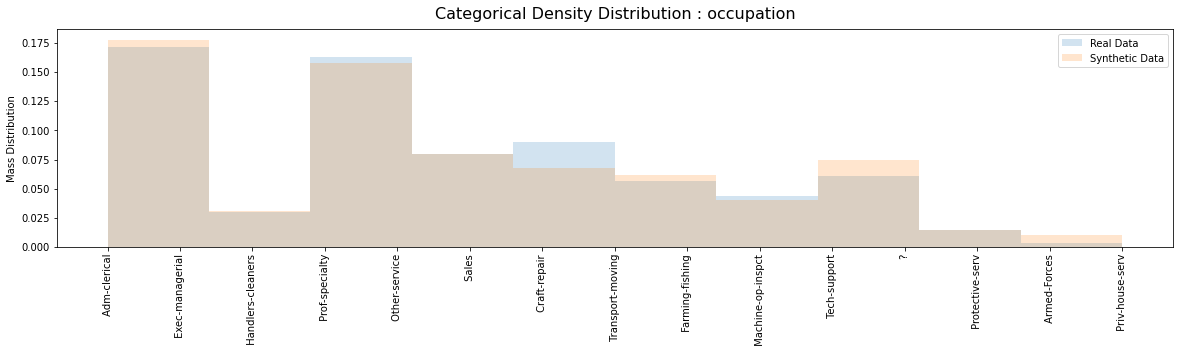

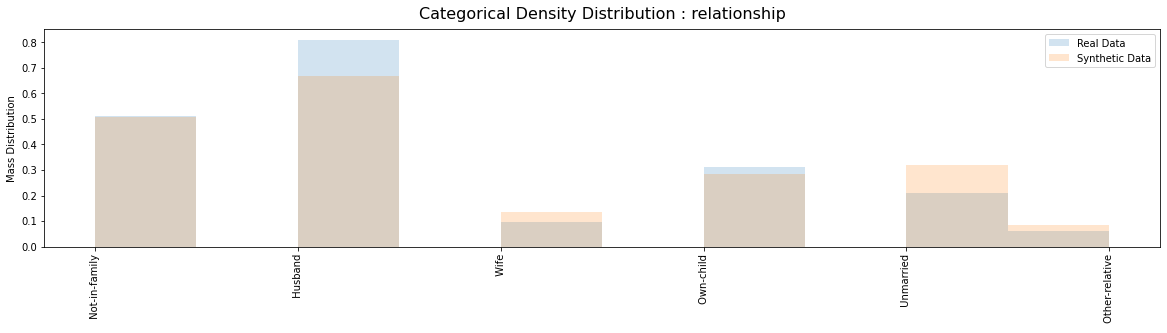

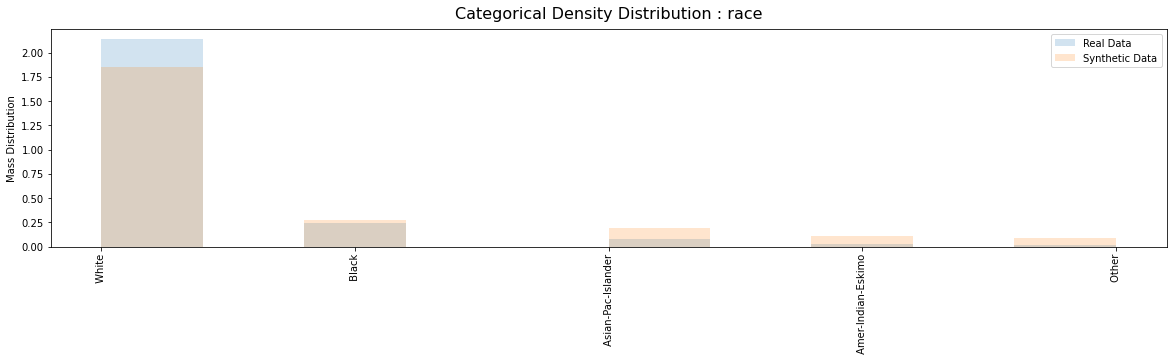

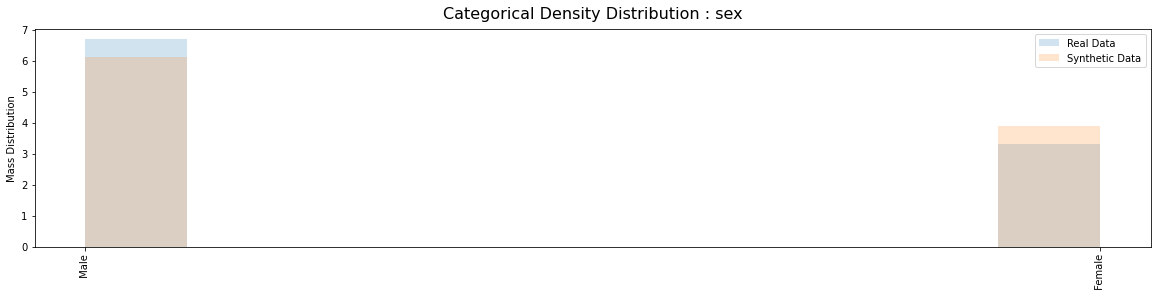

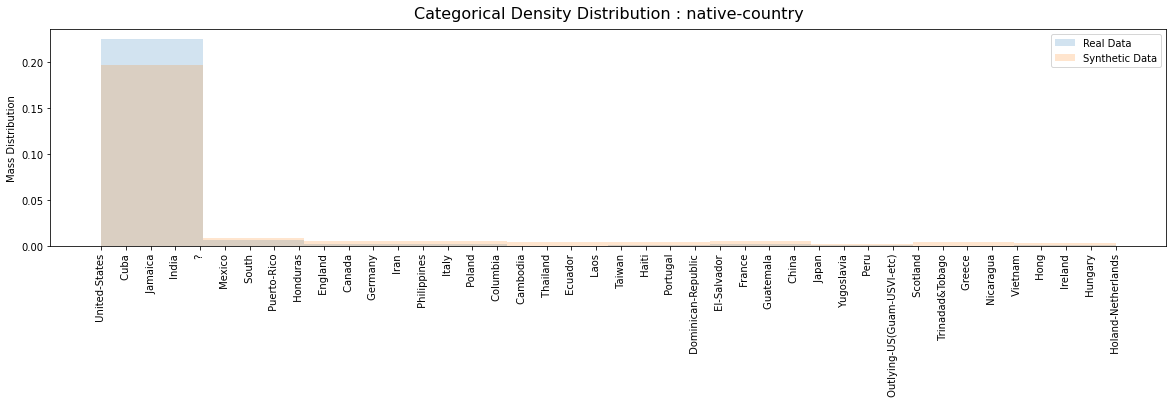

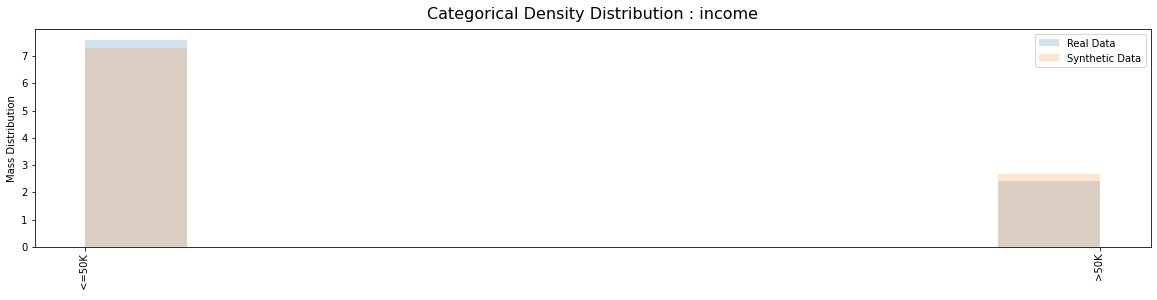

In [32]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [33]:
synth.save('F:/Users/Kaggle/wids/AdversarialAPI.pth')

#### 

## Normal API: Privately differentiable synthesizer

In [34]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cuda')   ### cpu else cuda

In [35]:
synth.fit(data=data,discrete_columns=discrete_columns,update_epsilon=1)

Iteration: [1]  [  0/159]  eta: 4:09:26  loss_t_fake: 0.4787 (0.6327)  loss_t_real: 0.6836 (0.7031)  time: 93.5428  data: 0.0000  max mem: 62
Iteration: [1]  [ 50/159]  eta: 0:04:24  loss_t_fake: 0.0080 (0.0875)  loss_t_real: 0.0478 (0.2935)  time: 0.5846  data: 0.0000  max mem: 62
Iteration: [1]  [100/159]  eta: 0:01:30  loss_t_fake: 0.0016 (0.0460)  loss_t_real: 0.0092 (0.1599)  time: 0.5757  data: 0.0000  max mem: 62
Iteration: [1]  [150/159]  eta: 0:00:11  loss_t_fake: 0.0006 (0.0311)  loss_t_real: 0.0032 (0.1089)  time: 0.5751  data: 0.0000  max mem: 62
Iteration: [1]  [159/159]  eta: 0:00:01  loss_t_fake: 0.0005 (0.0294)  loss_t_real: 0.0030 (0.1030)  time: 0.5680  data: 0.0000  max mem: 62
Iteration: [1] Total time: 0:03:05
Iteration: [1]  [0/4]  eta: 0:00:00  loss_t_fake: 0.0005 (0.0294)  loss_t_real: 0.0030 (0.1030)  loss_s: 0.8012 (0.8048)  time: 0.1262  data: 0.0000  max mem: 63
Iteration: [1]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0005 (0.0294)  loss_t_real: 0.0030 (0.1030)  

In [36]:
sample = synth.sample(1000)

In [37]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

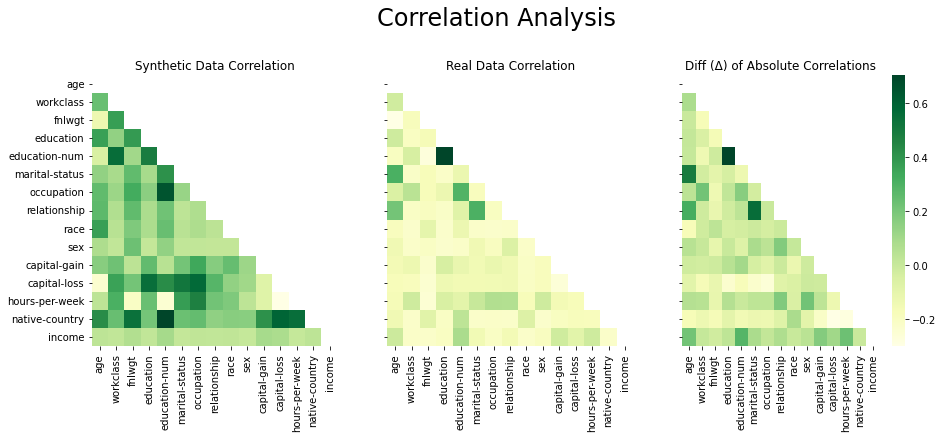

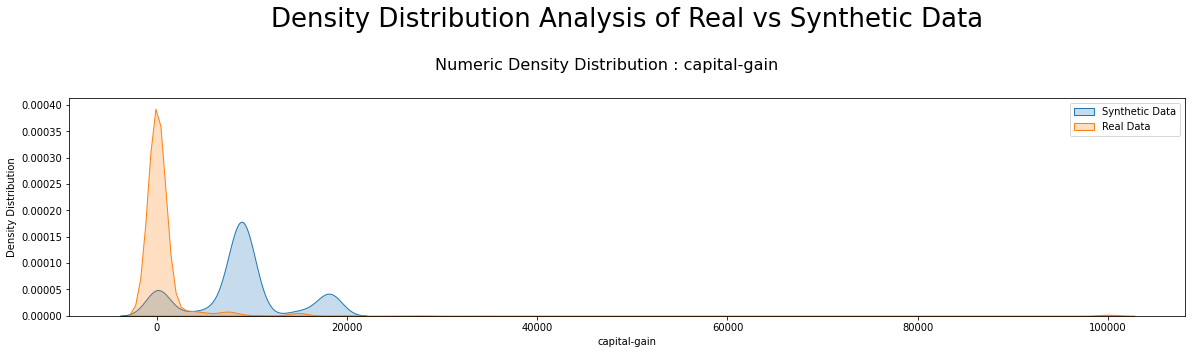

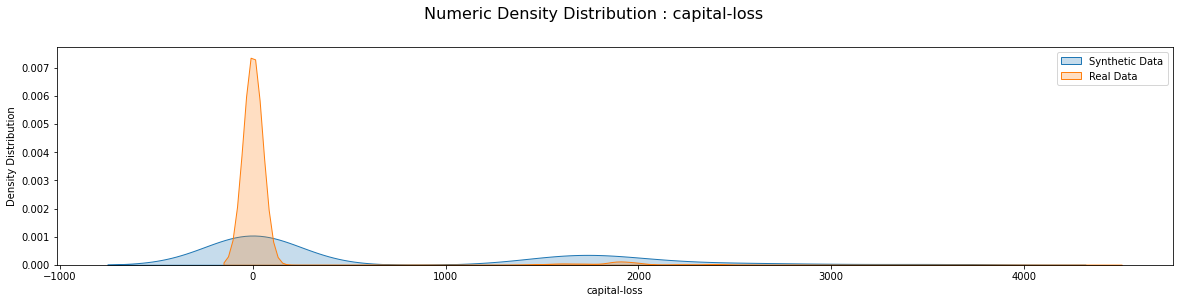

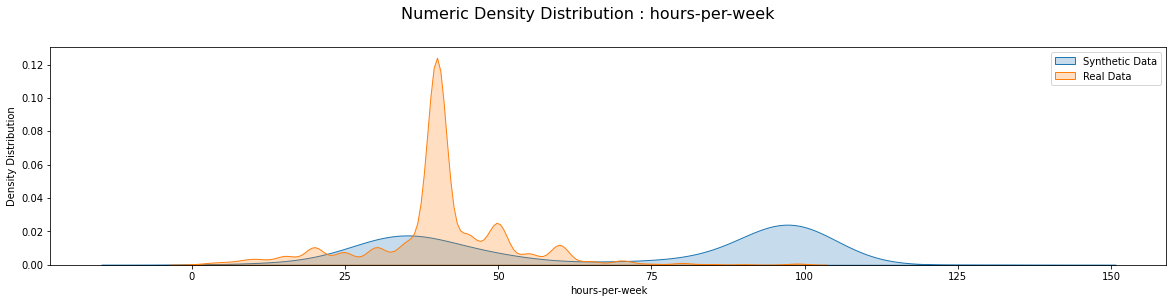

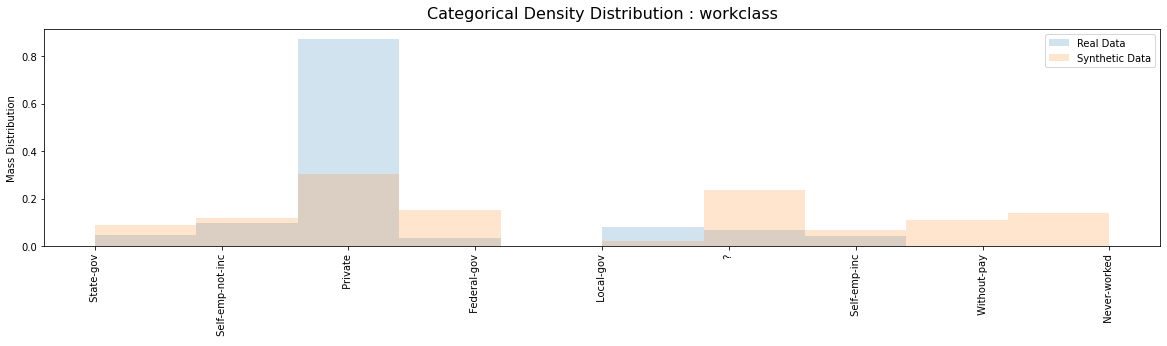

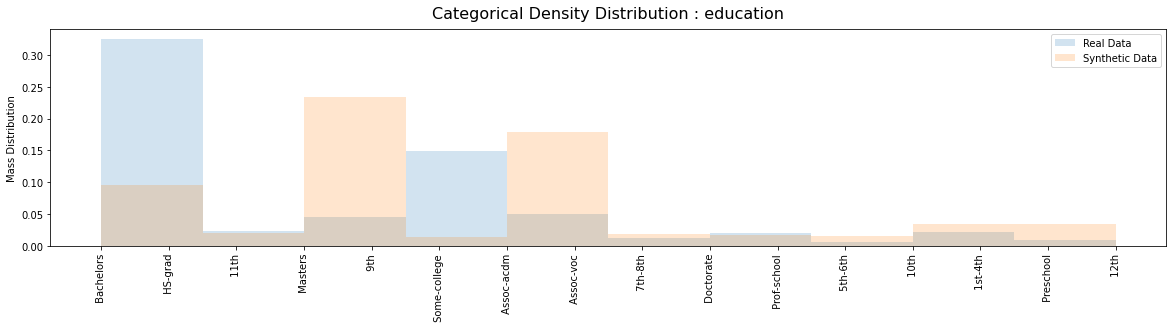

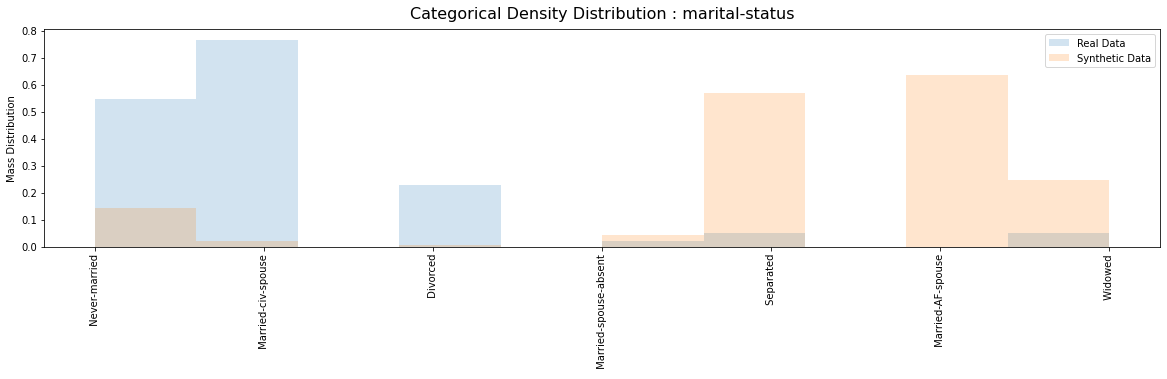

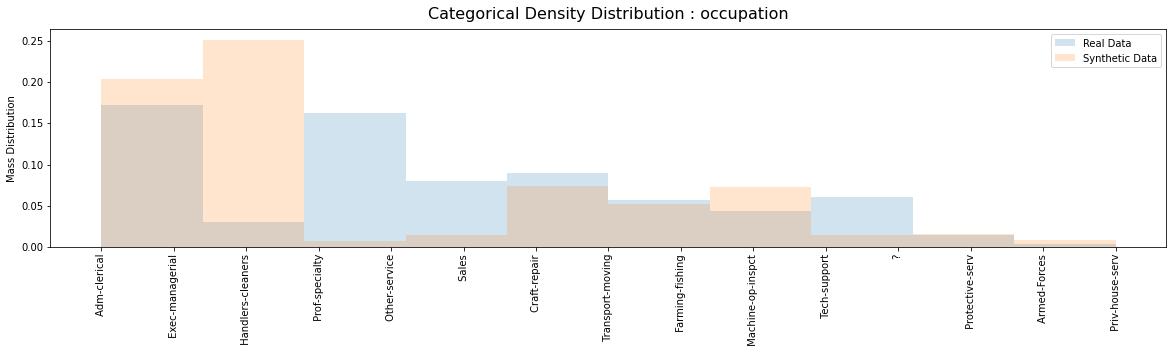

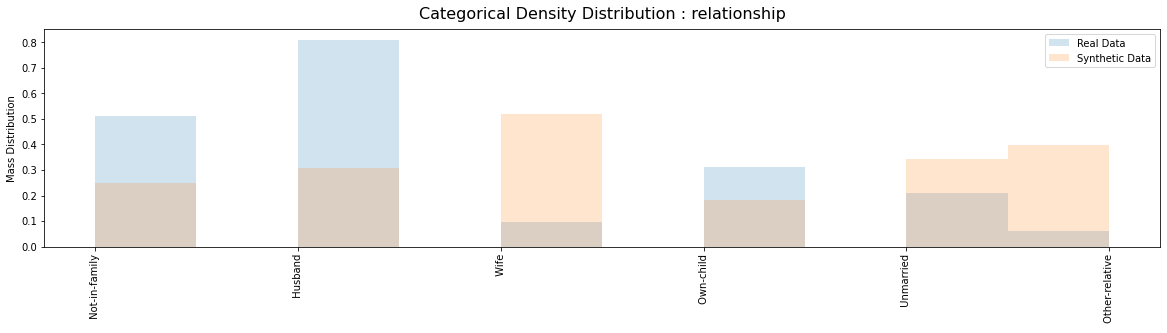

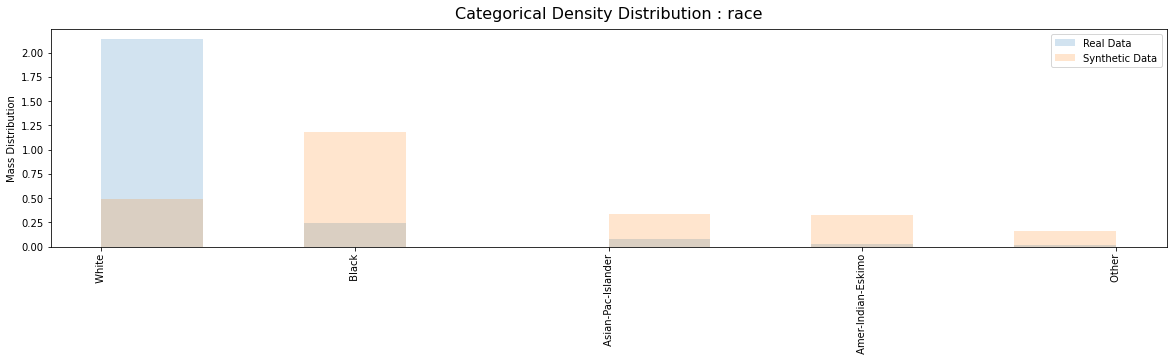

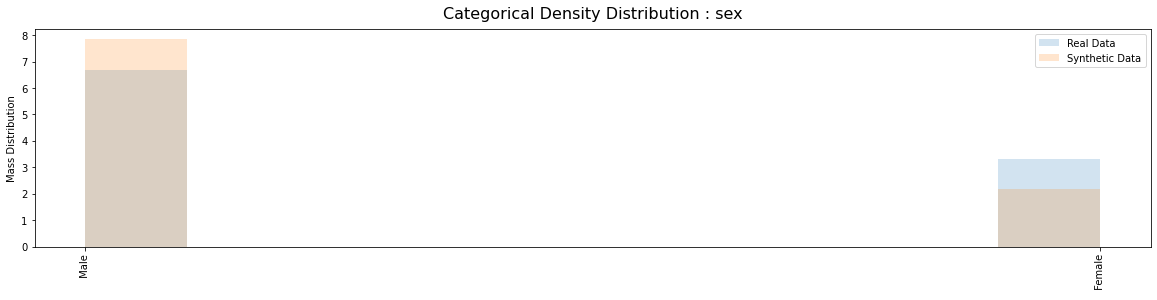

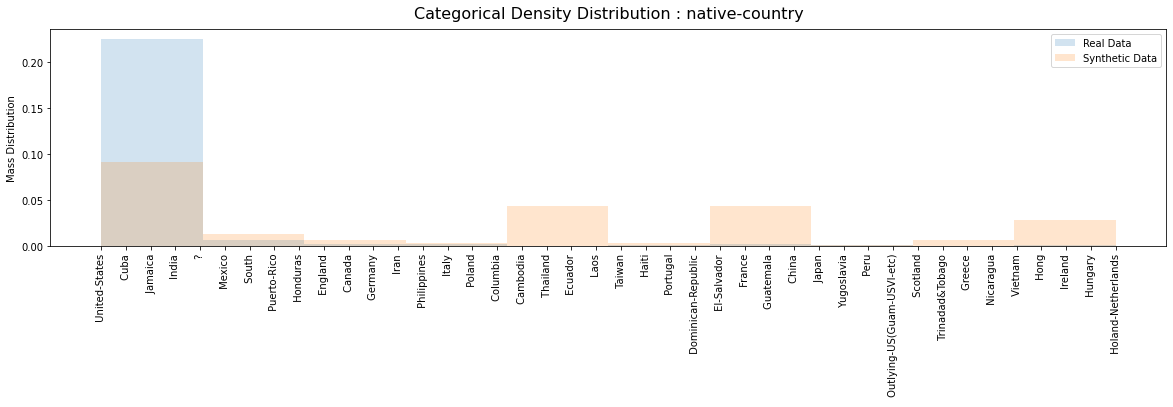

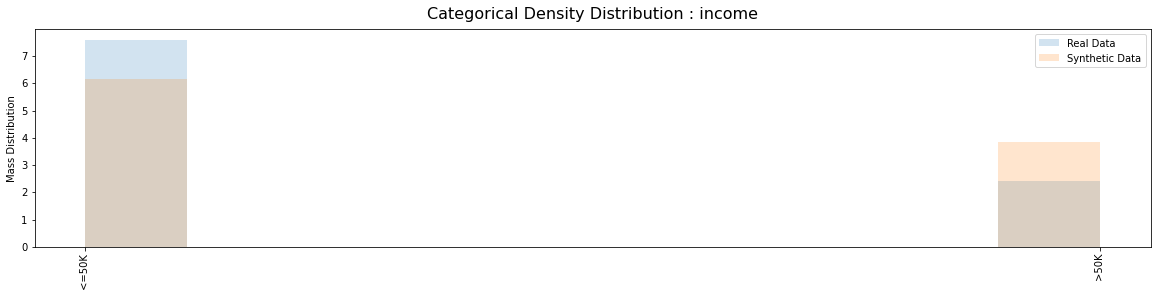

In [38]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

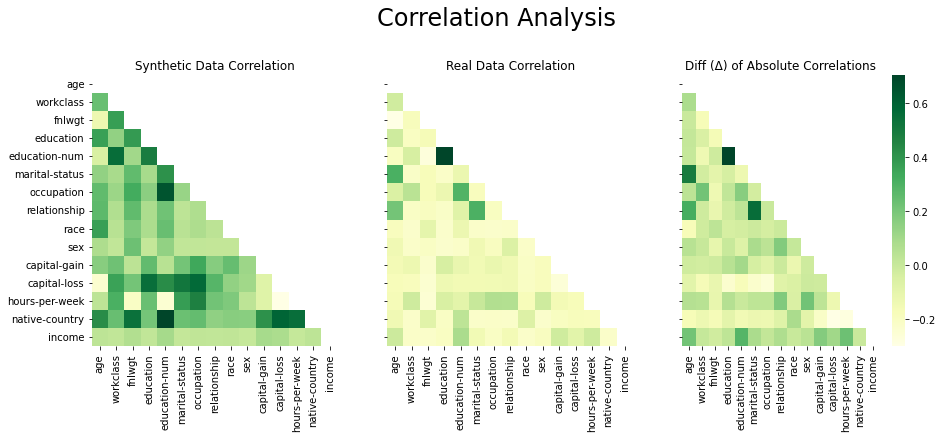

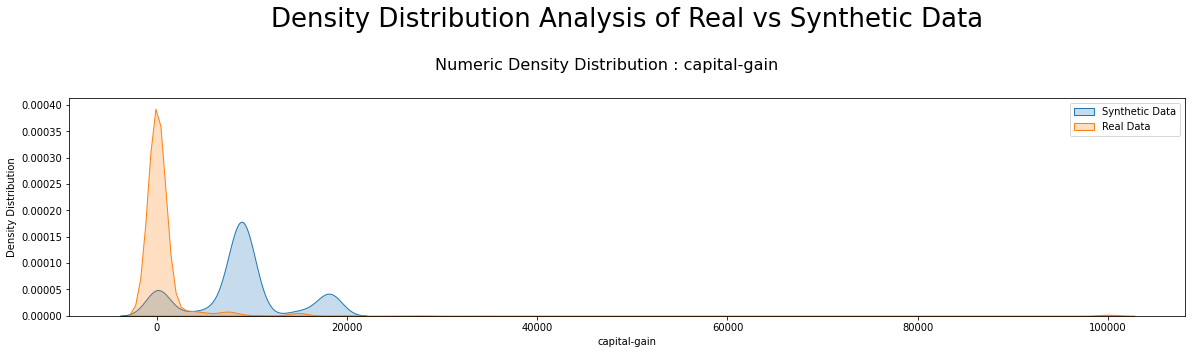

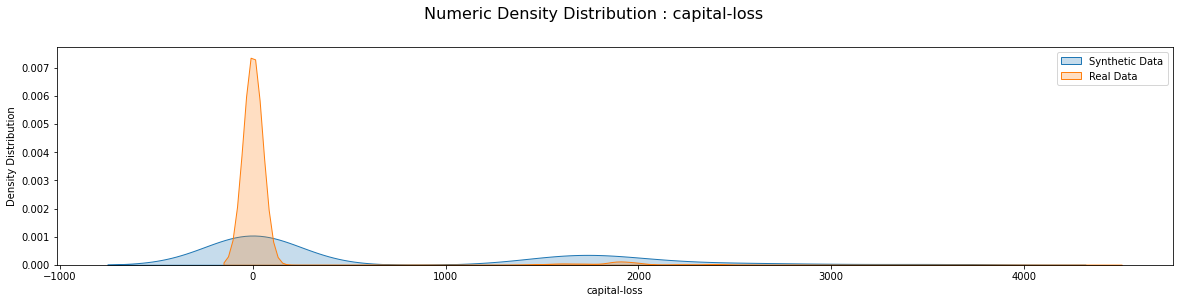

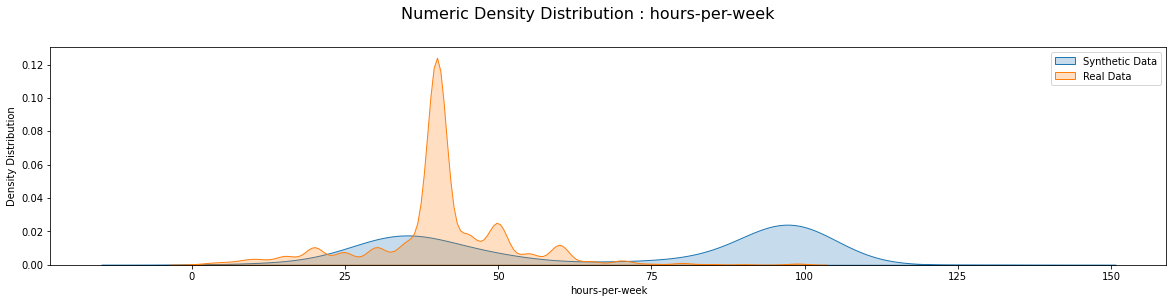

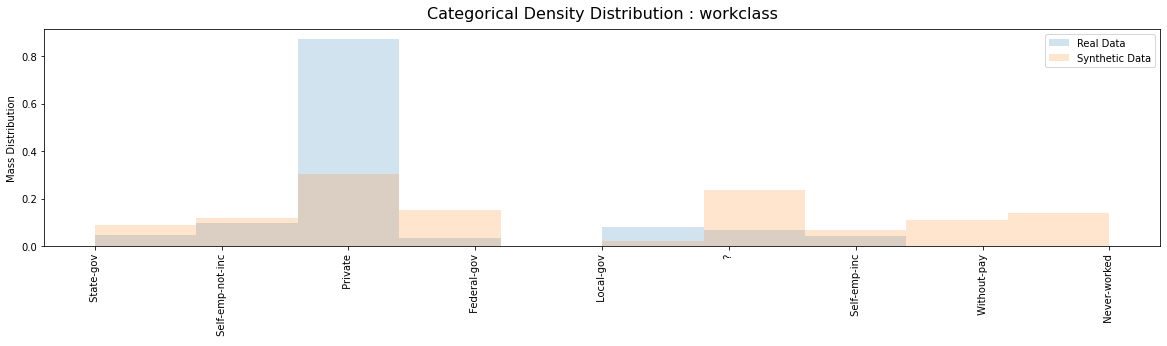

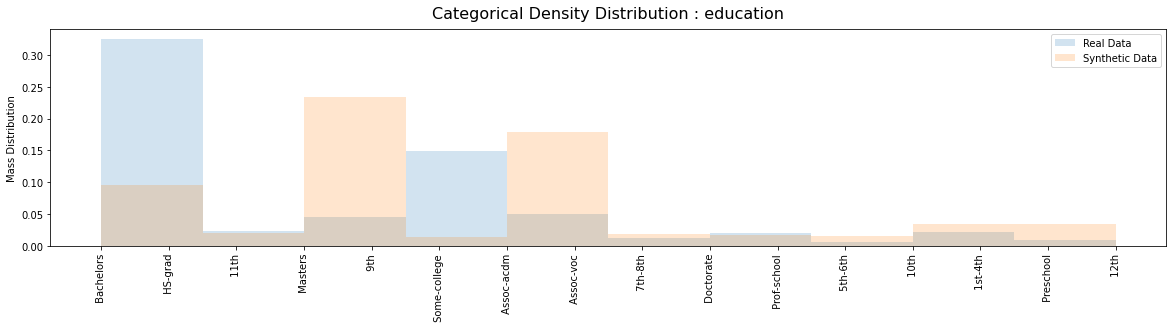

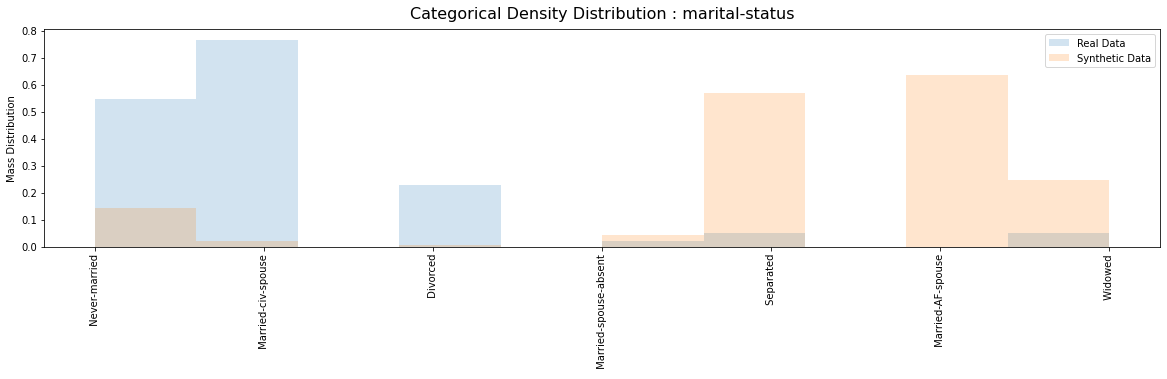

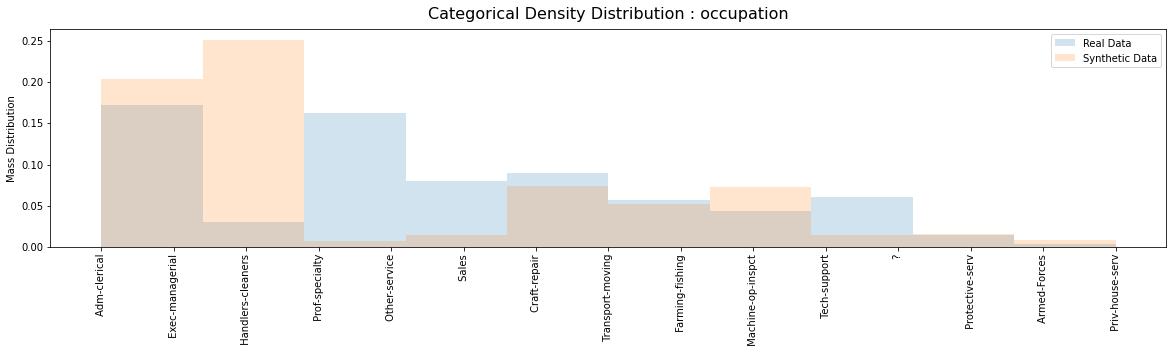

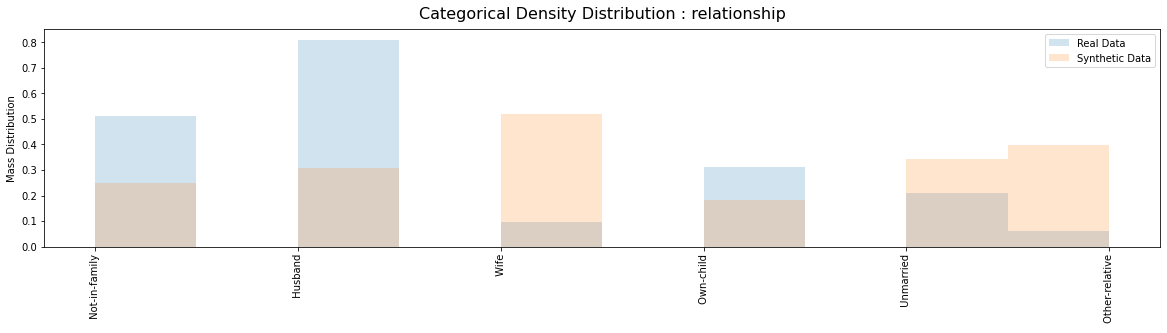

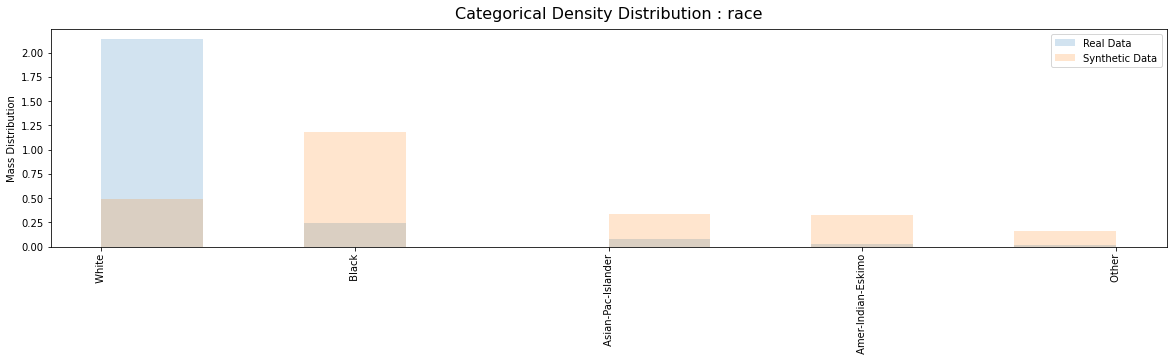

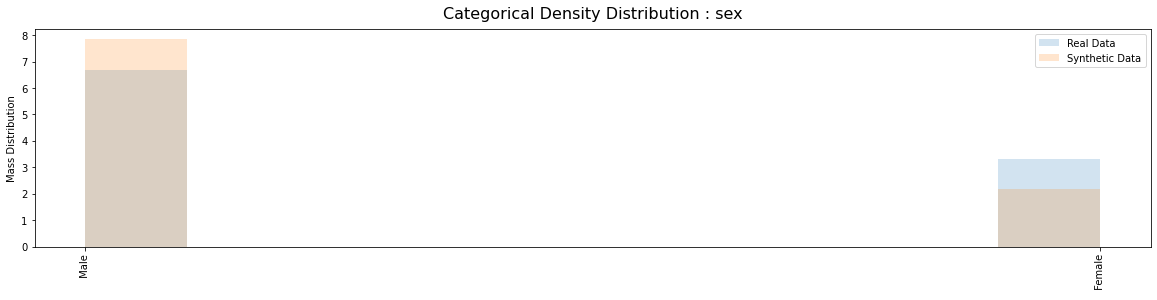

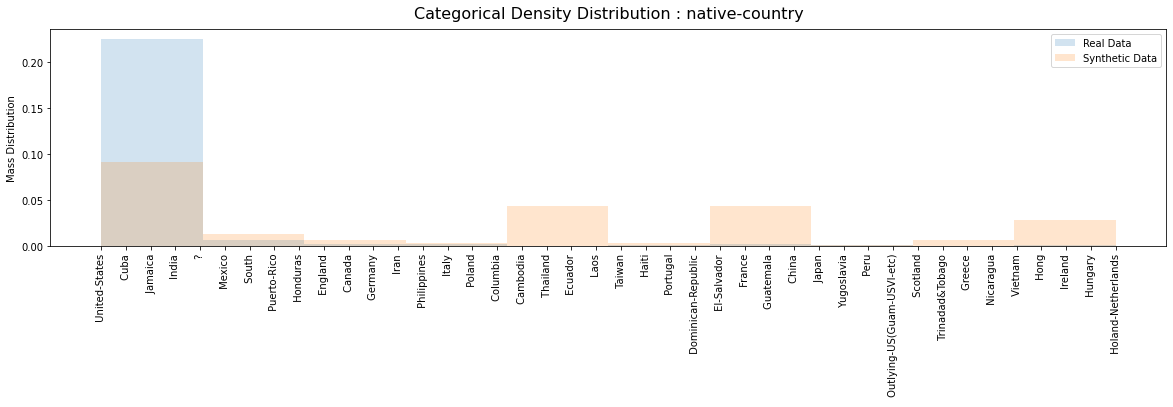

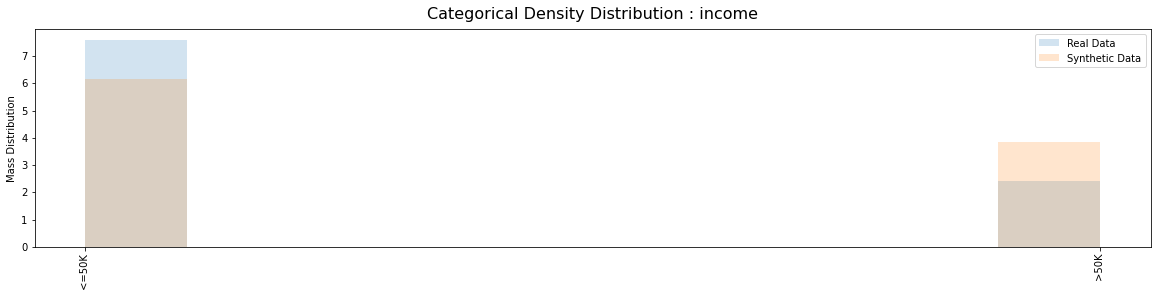

In [39]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

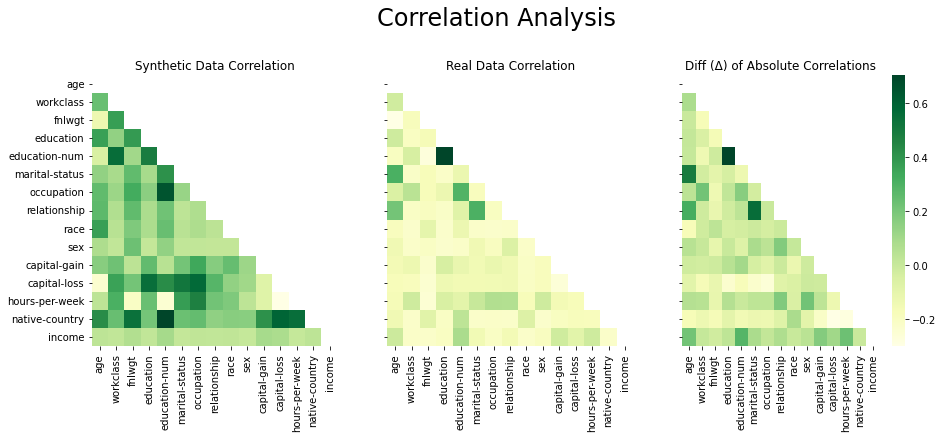

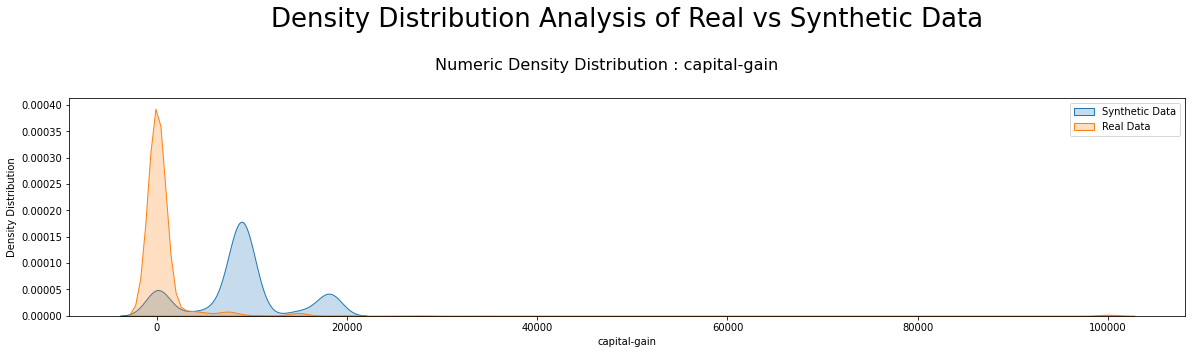

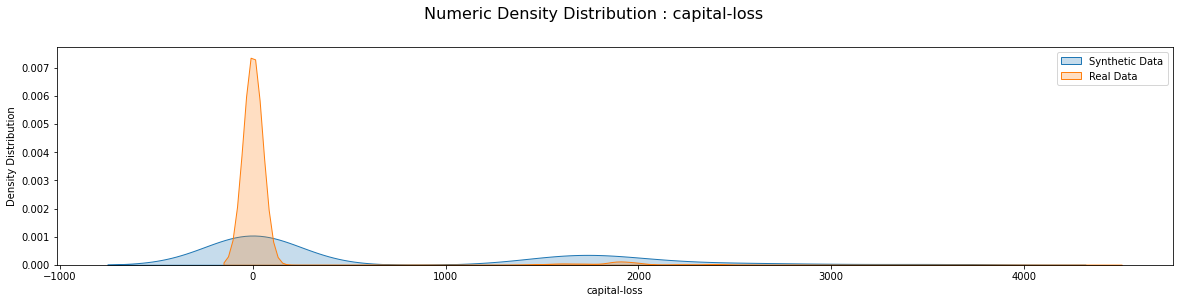

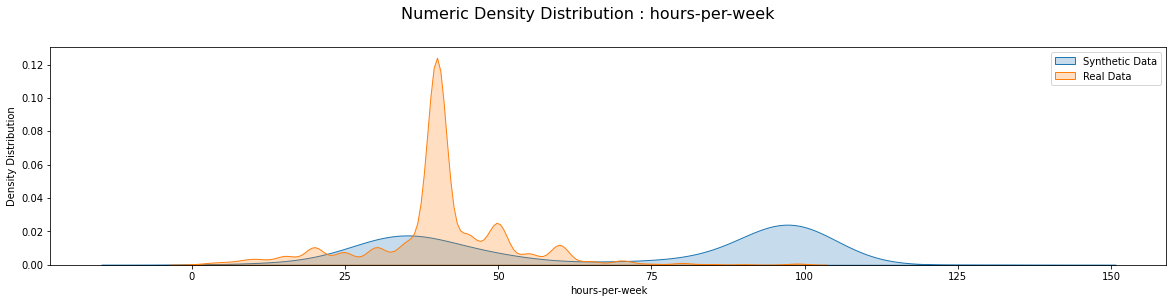

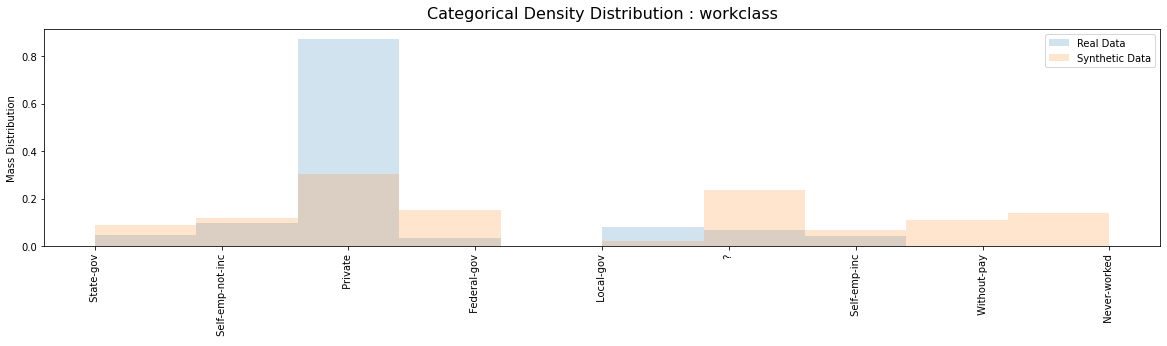

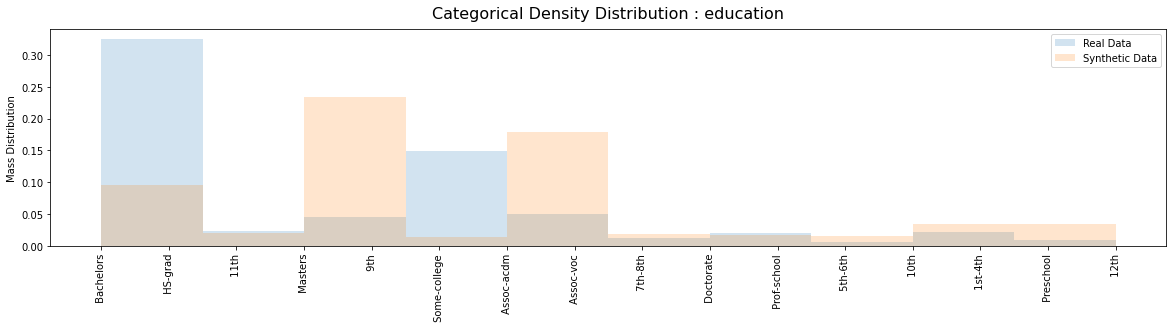

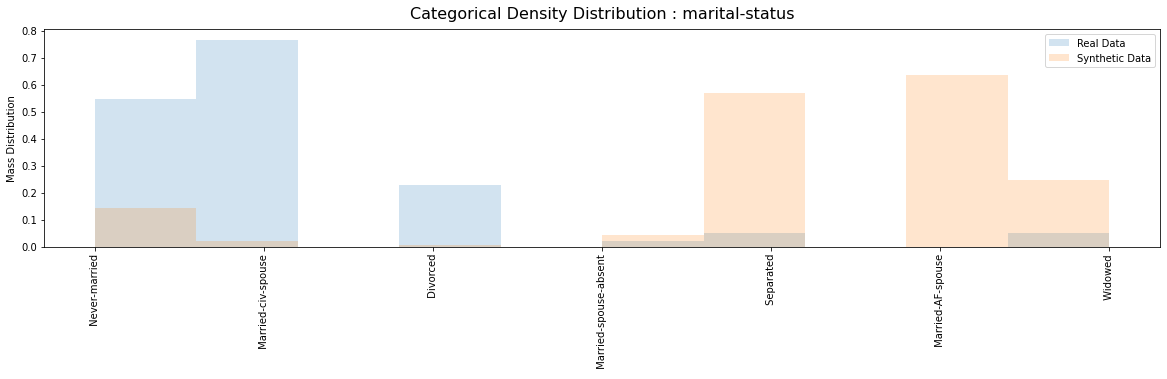

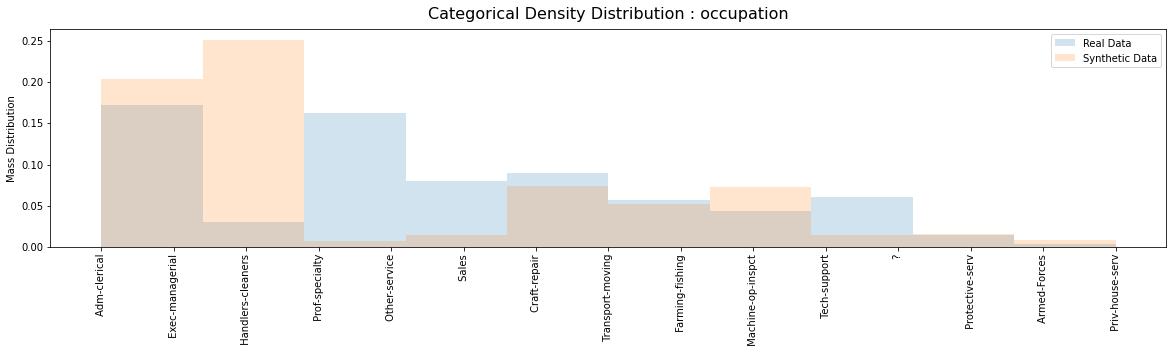

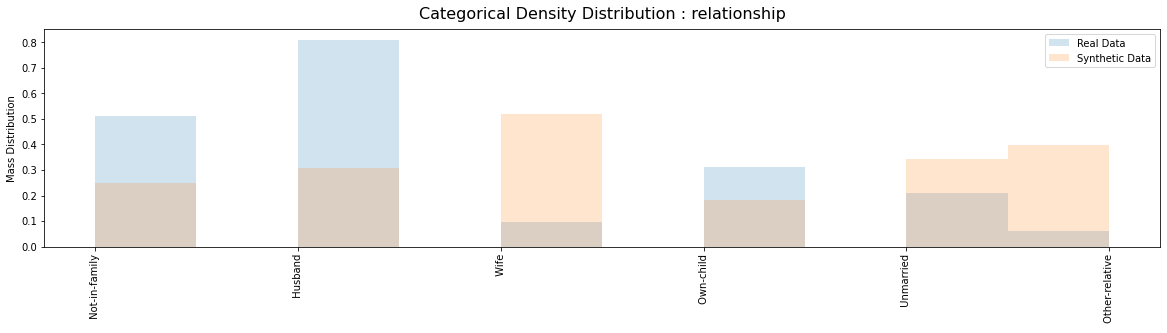

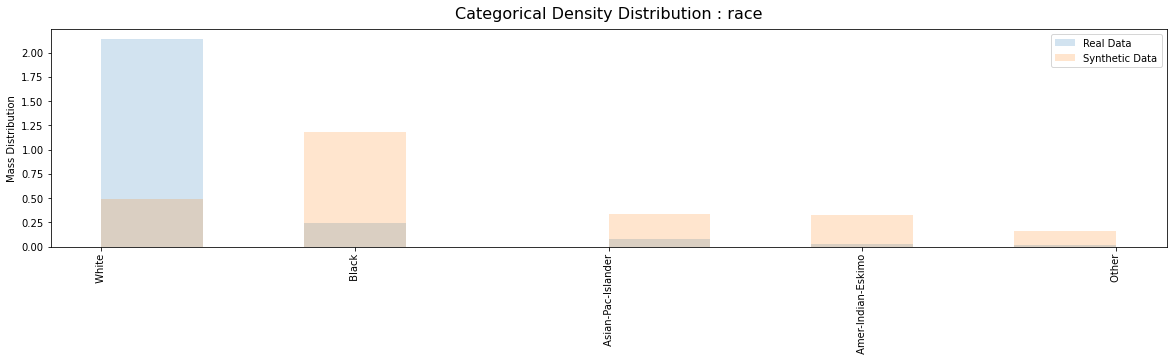

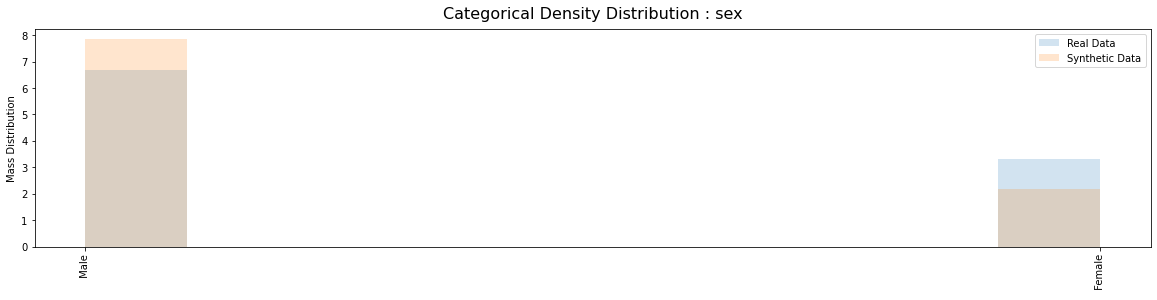

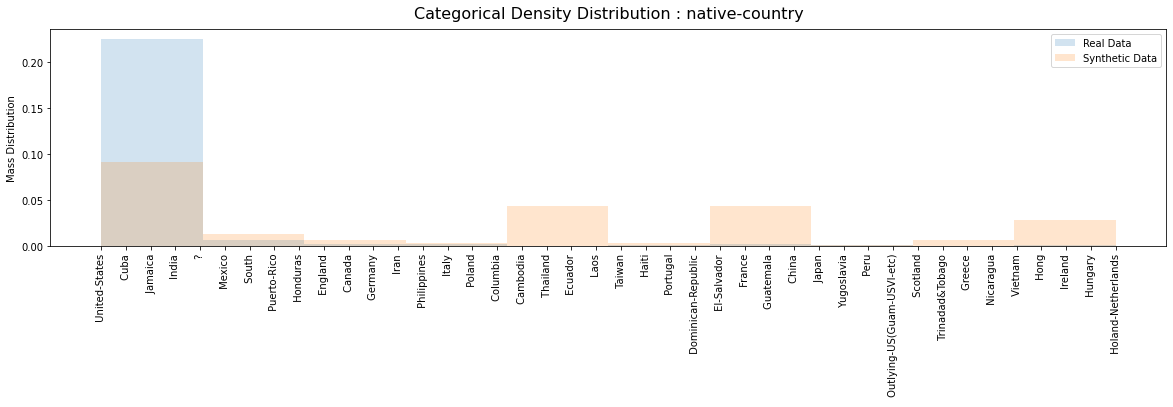

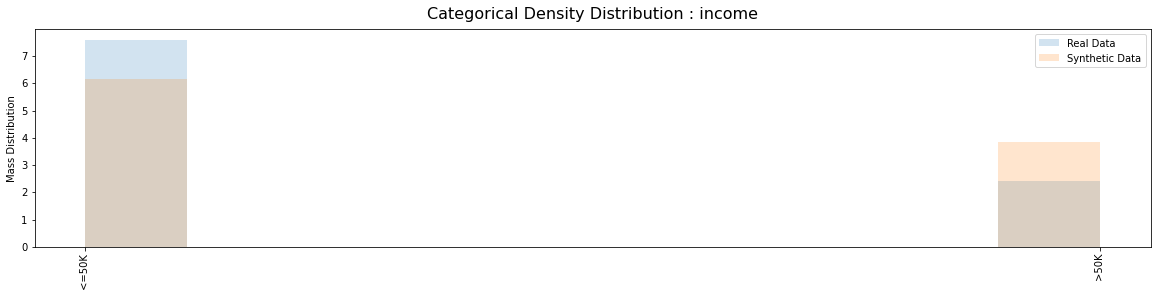

In [40]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [41]:
synth.save('F:/Users/Kaggle/wids/PrivateModelNormalAPI.pth')

#### 

## Adversarial API: Privately differentiable synthesizer

In [42]:
synth = PrivateTwinSynthesizer(epsilon=0.1,batch_size=64,device='cuda')   ### cpu else cuda

In [43]:
synth.fit_adversarial(data=data,discrete_columns=discrete_columns,update_epsilon=1)

Generating train and test splits ...
TRAIN SAMPLES: n=26048
TEST SAMPLES: n=6513
Iteration: [1]  [  0/129]  eta: 0:01:01  loss_t_fake: 0.5879 (0.7448)  loss_t_real: 0.6553 (0.7024)  time: 0.4757  data: 0.0000  max mem: 63
Iteration: [1]  [ 50/129]  eta: 0:00:30  loss_t_fake: 0.0074 (0.1032)  loss_t_real: 0.0542 (0.2888)  time: 0.3806  data: 0.0000  max mem: 63
Iteration: [1]  [100/129]  eta: 0:00:11  loss_t_fake: 0.0016 (0.0539)  loss_t_real: 0.0097 (0.1579)  time: 0.3771  data: 0.0000  max mem: 63
Iteration: [1]  [129/129]  eta: 0:00:00  loss_t_fake: 0.0009 (0.0422)  loss_t_real: 0.0053 (0.1244)  time: 0.3823  data: 0.0000  max mem: 63
Iteration: [1] Total time: 0:00:49
Iteration: [1]  [0/4]  eta: 0:00:00  loss_t_fake: 0.0009 (0.0422)  loss_t_real: 0.0053 (0.1244)  loss_s: 0.9174 (0.9082)  time: 0.0997  data: 0.0000  max mem: 63
Iteration: [1]  [1/4]  eta: 0:00:00  loss_t_fake: 0.0009 (0.0422)  loss_t_real: 0.0053 (0.1244)  loss_s: 0.8291 (0.8523)  time: 0.0992  data: 0.0000  max mem:

In [44]:
sample = synth.sample_adversarial(data,1000)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [45]:
metrics = SingleTableMetric.get_subclasses()
numeric_features = ['capital-gain','capital-loss','hours-per-week']
discrete_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
    "income",
]

#### Report with privacy metrics

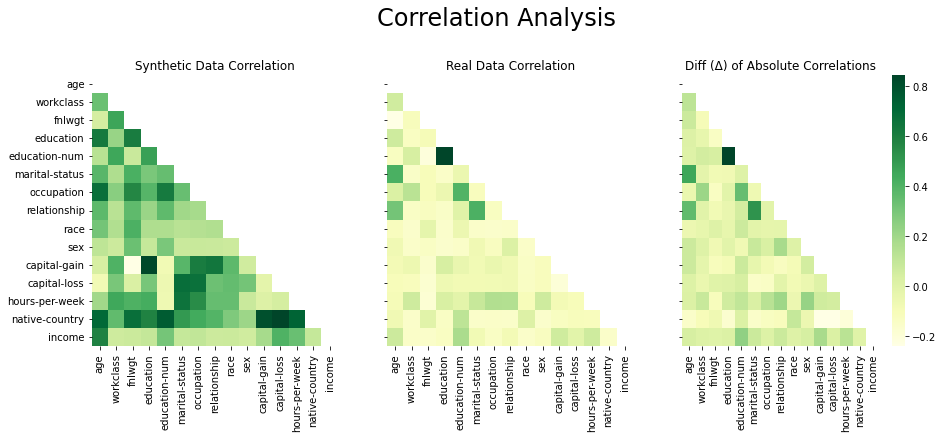

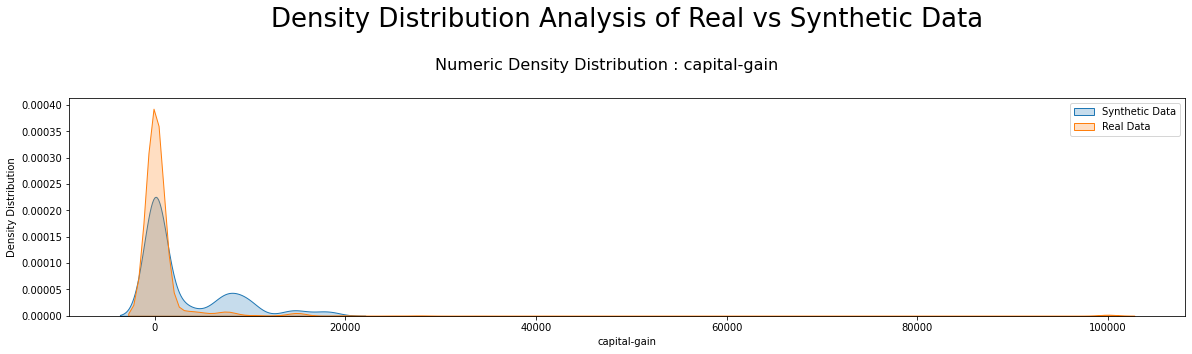

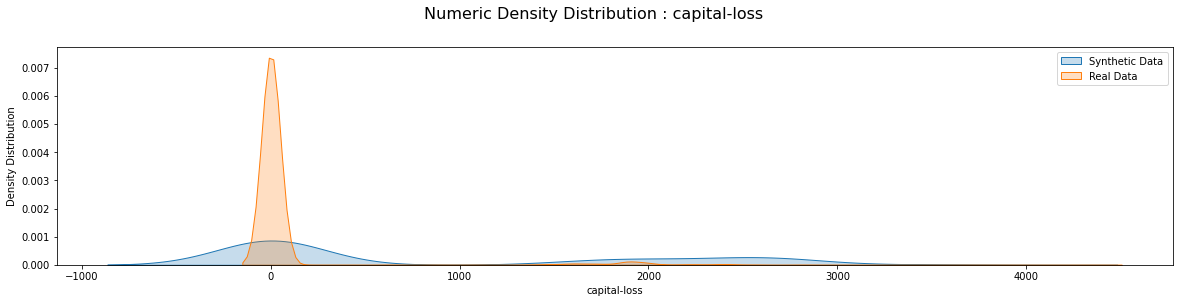

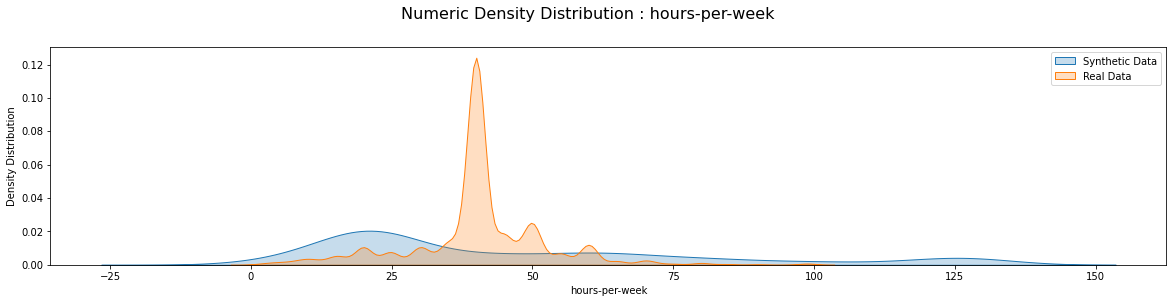

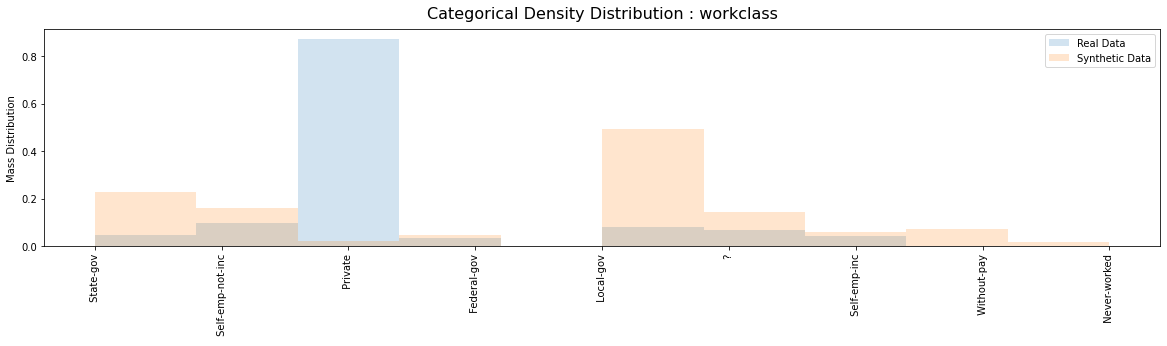

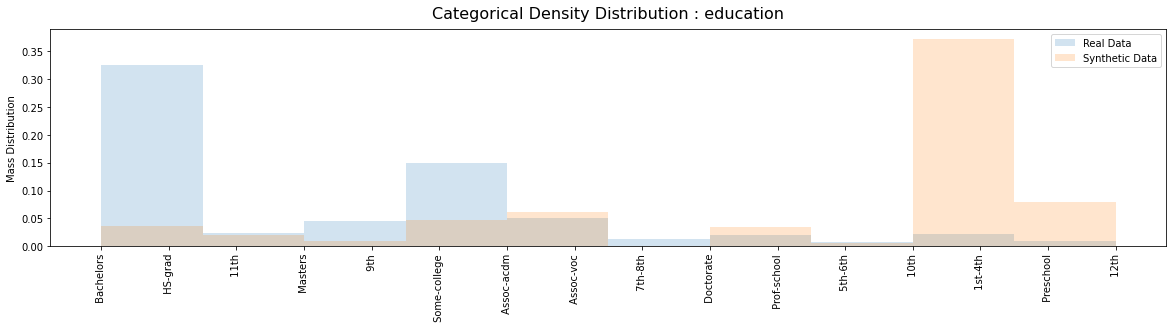

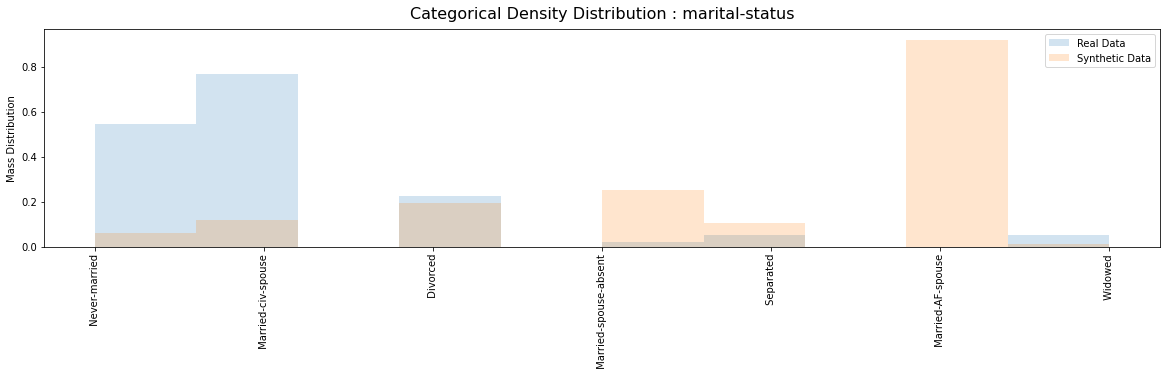

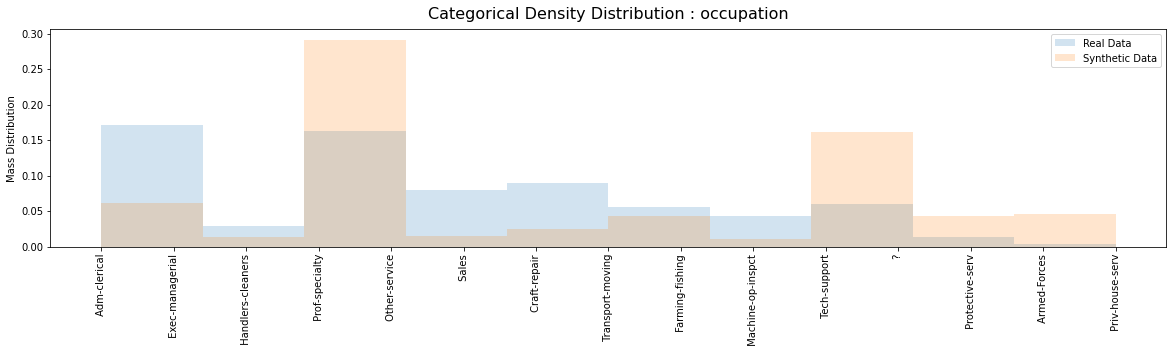

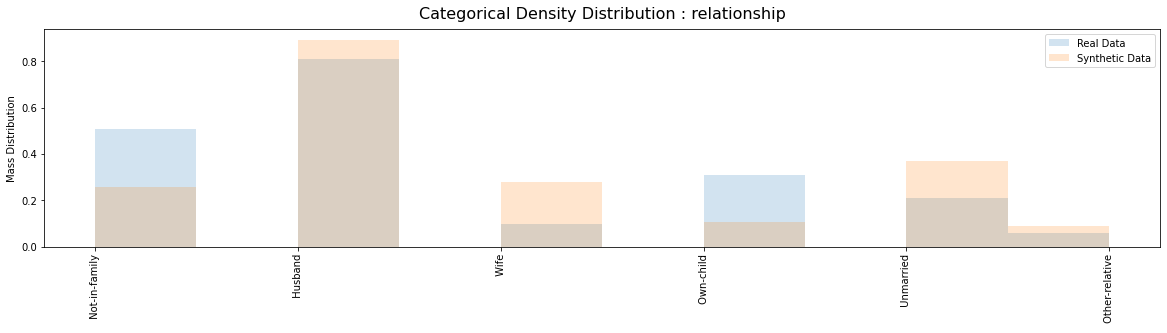

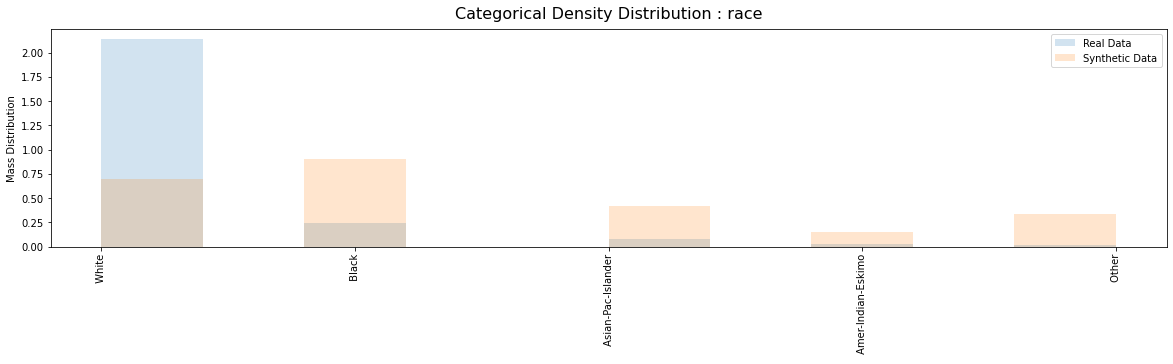

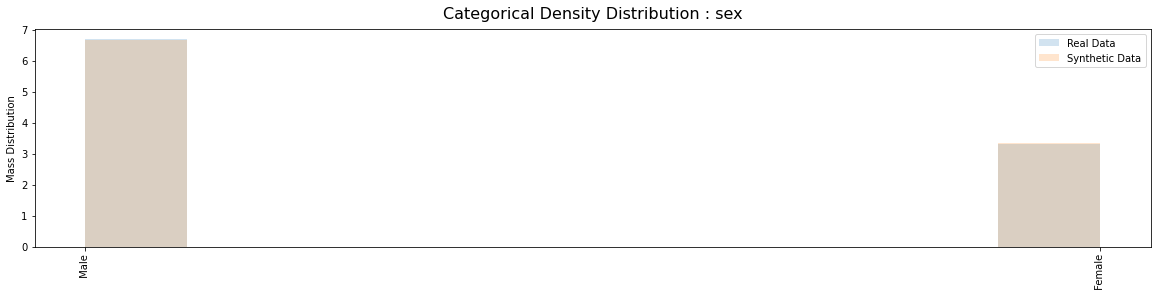

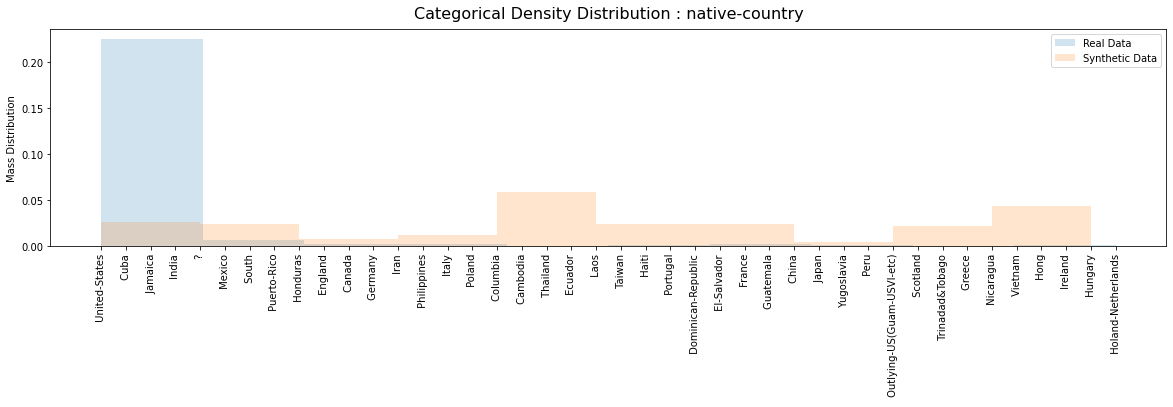

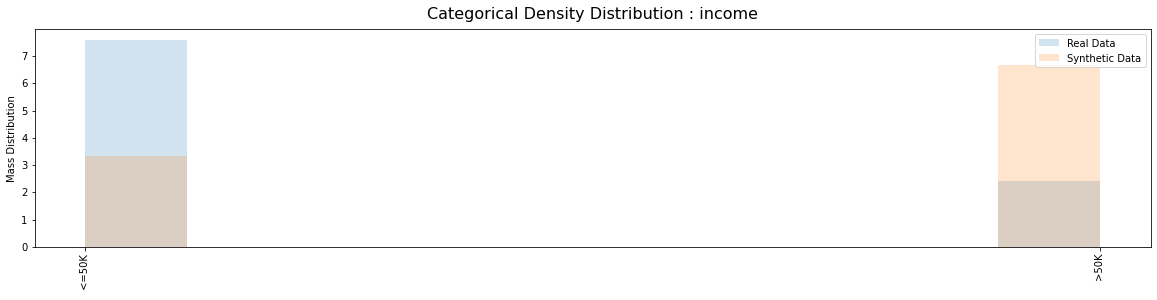

In [46]:
get_full_report(data, sample,discrete_columns,numeric_features, key_fields=['age','workclass','education'],sensitive_fields = ['income'])

#### Report without privacy metrics, but includes ML efficacy stuff

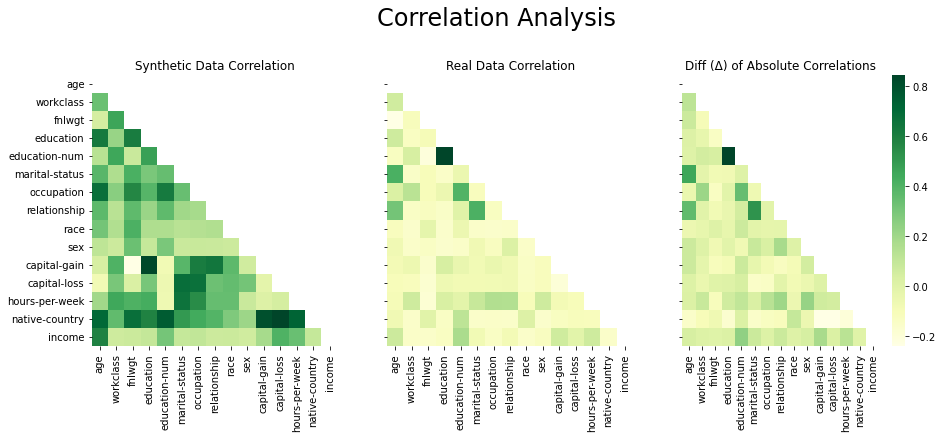

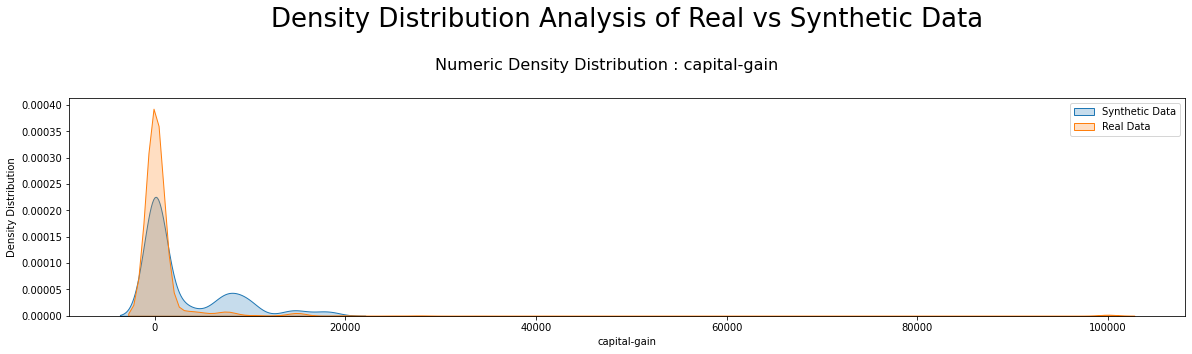

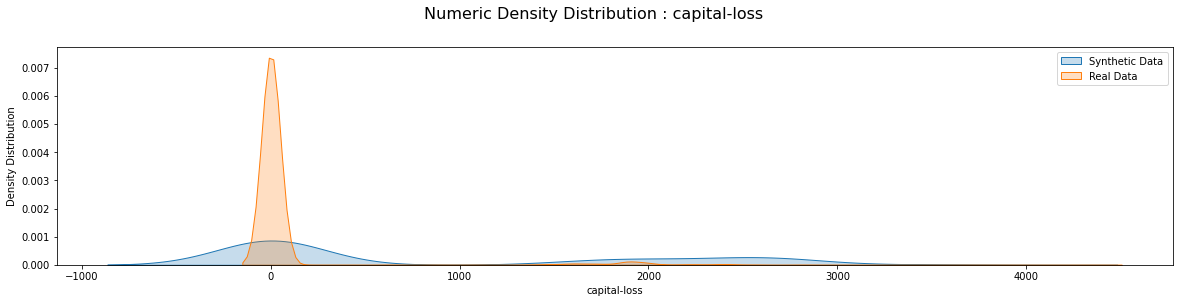

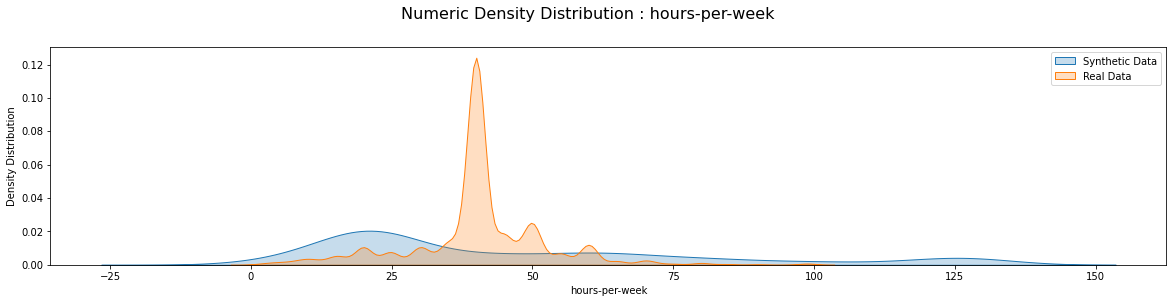

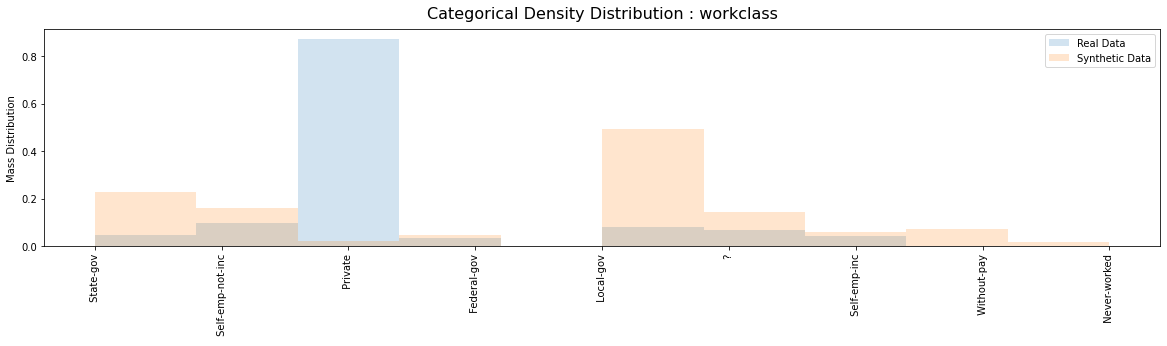

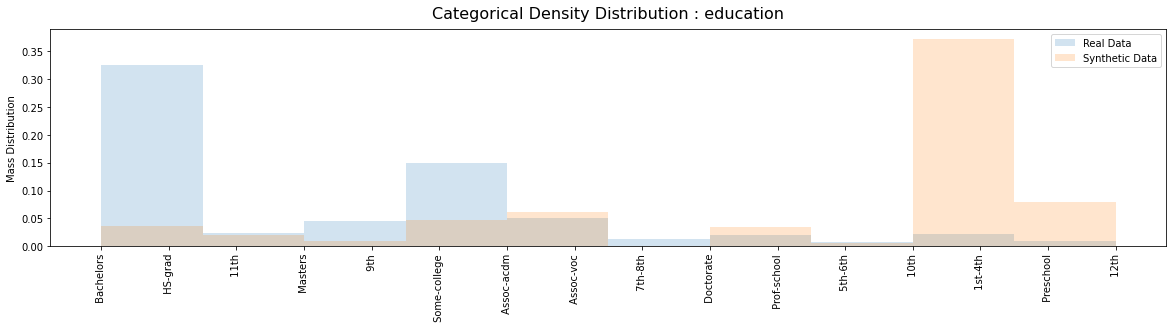

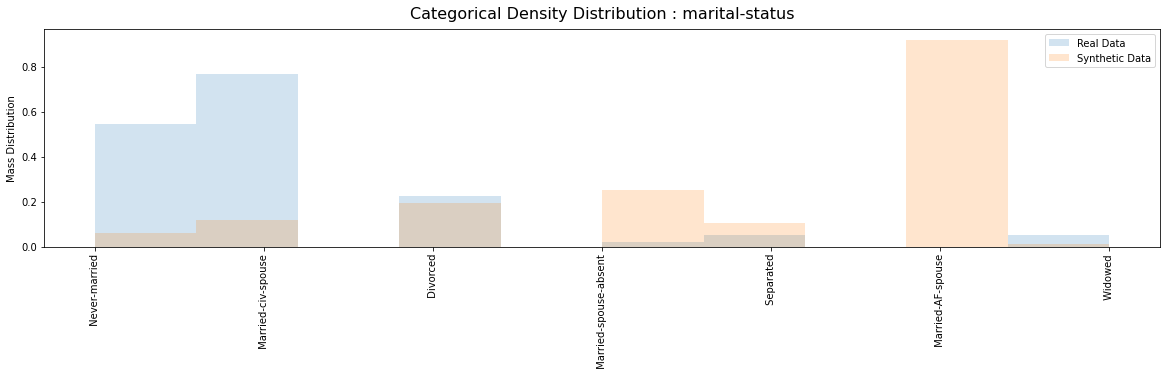

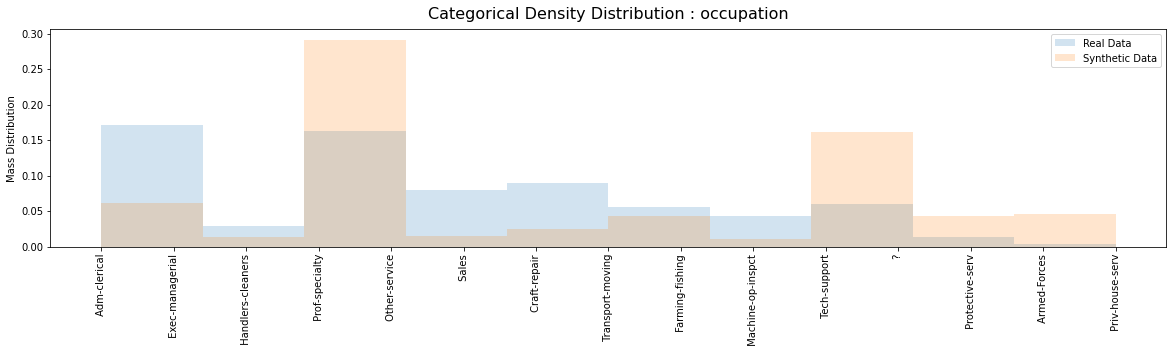

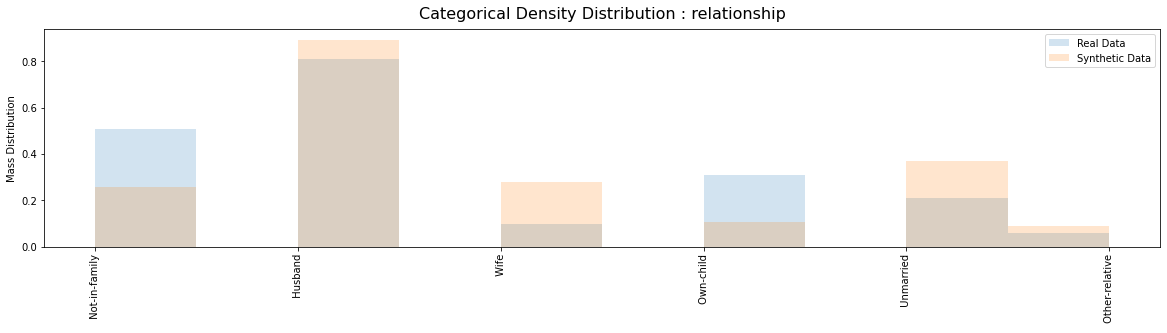

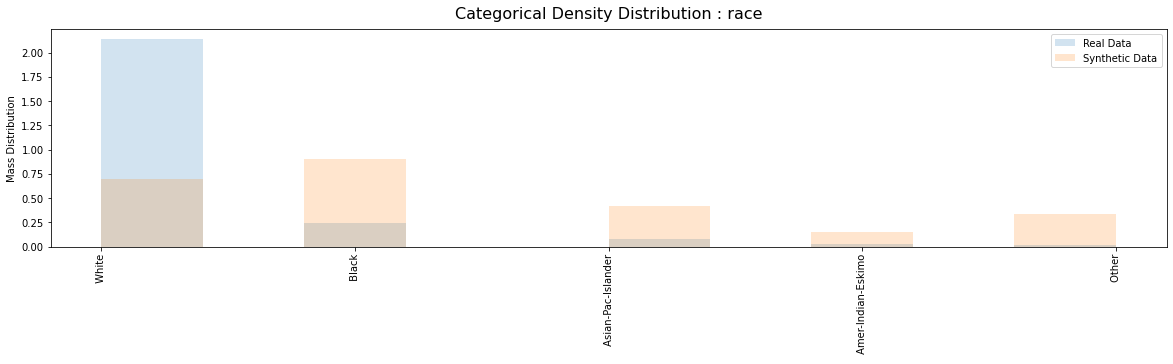

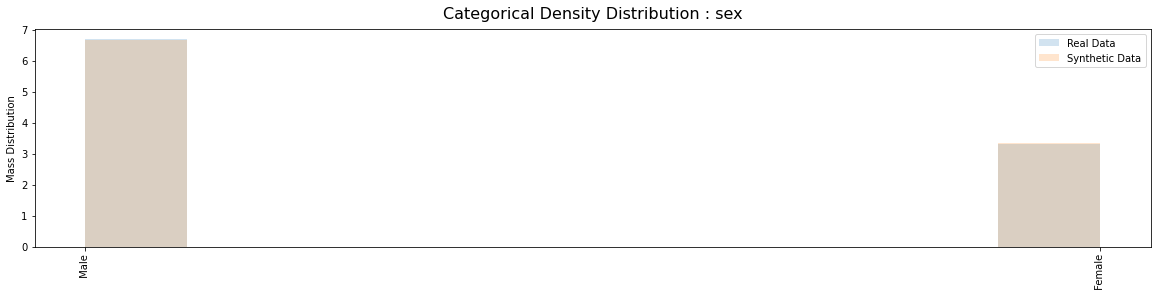

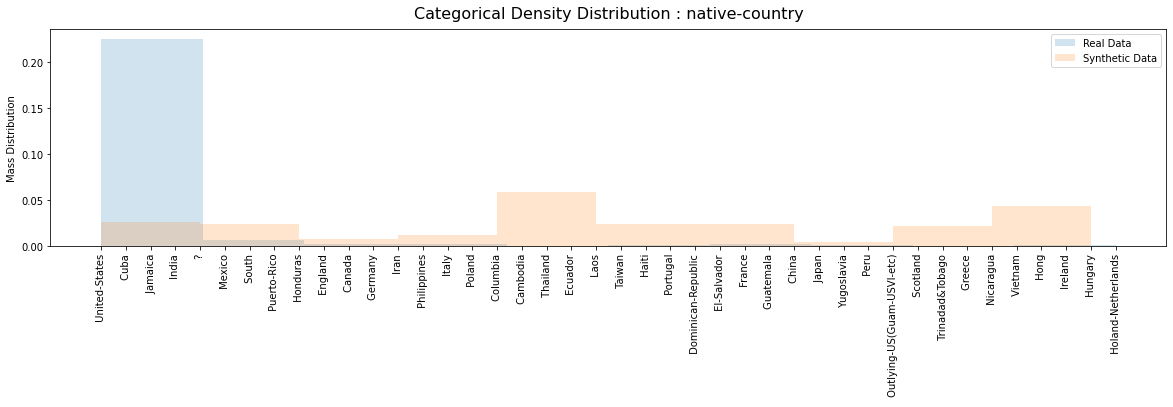

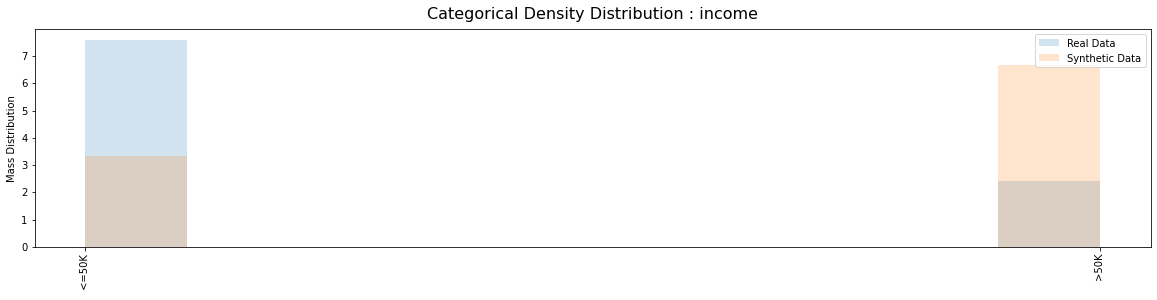

In [47]:
get_full_report(data, sample,discrete_columns,numeric_features,target='income')

#### Report without privacy metrics and without ML efficacy stuff

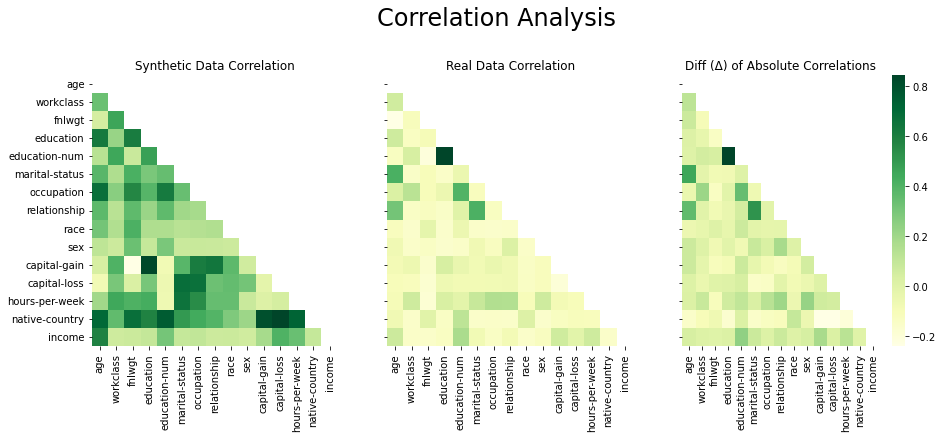

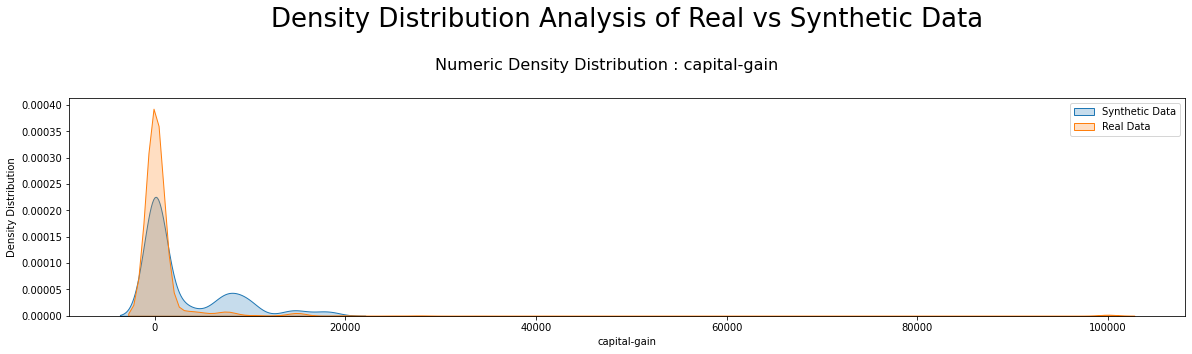

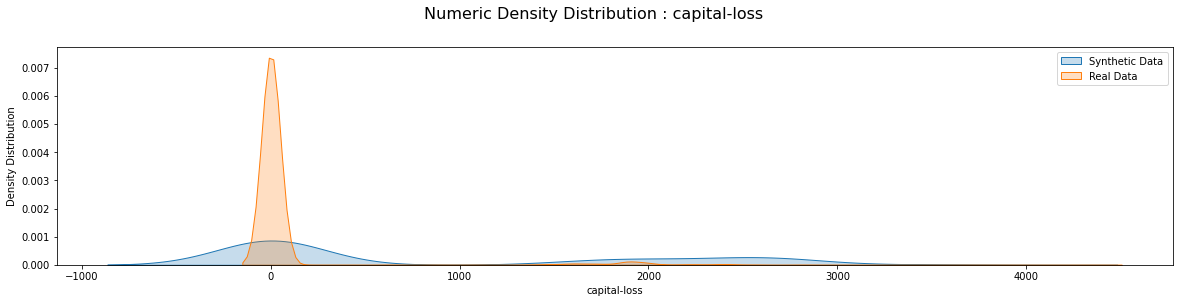

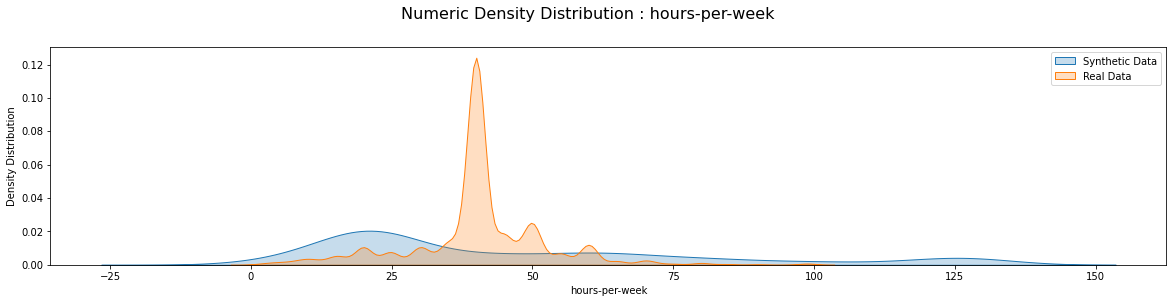

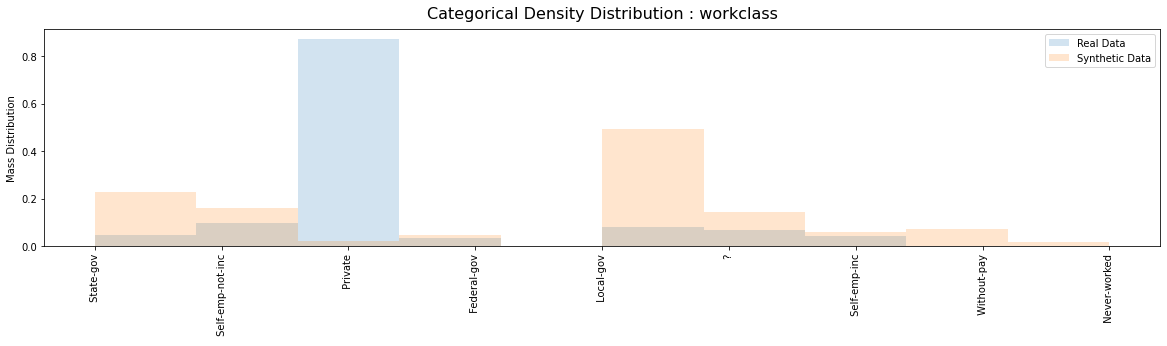

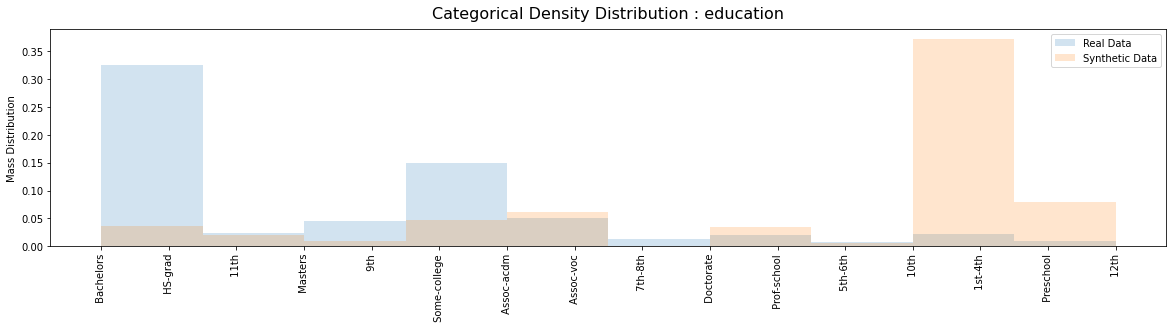

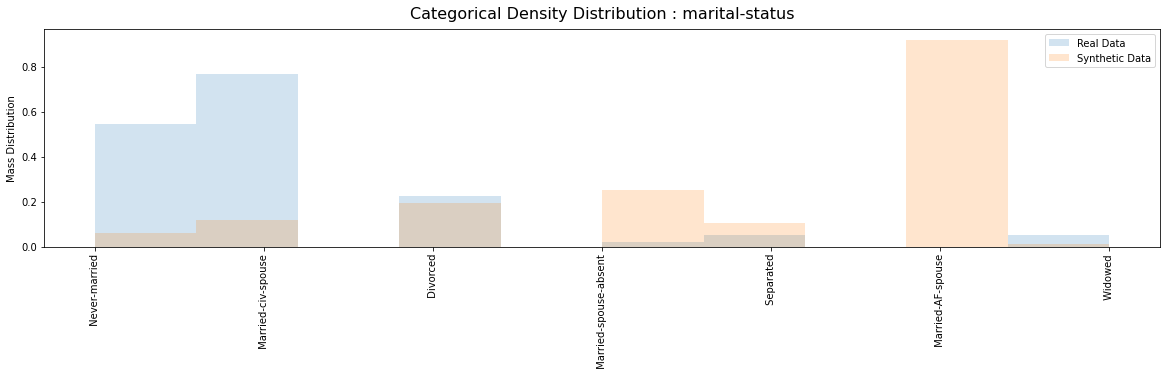

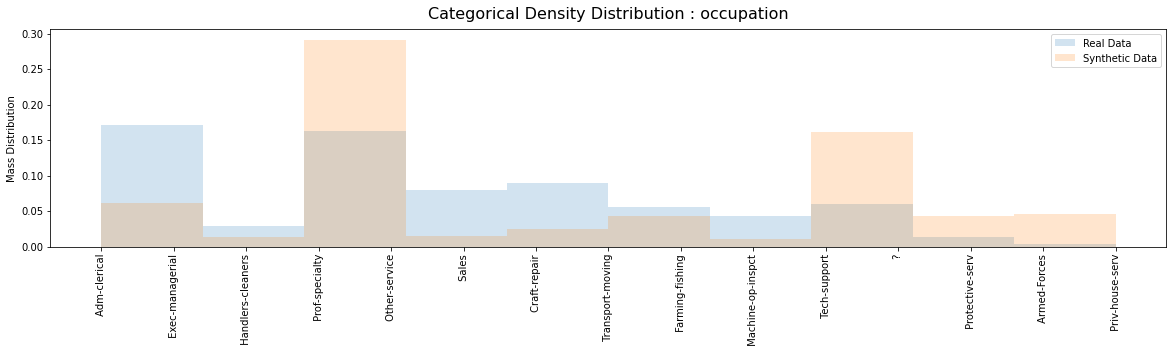

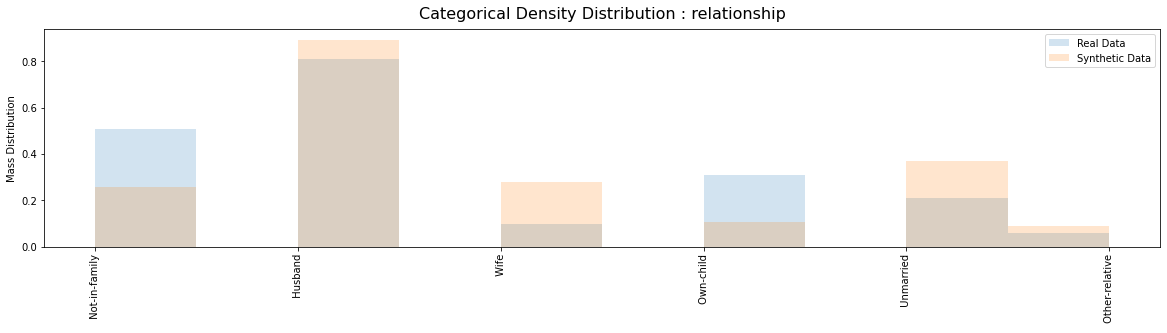

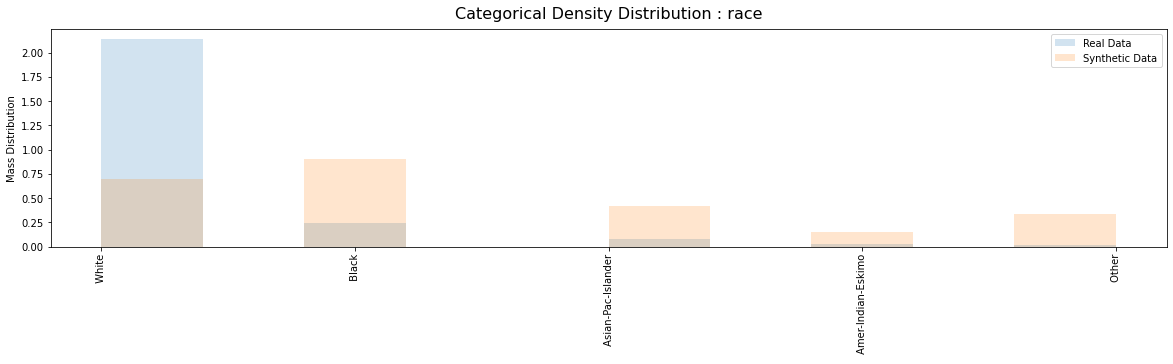

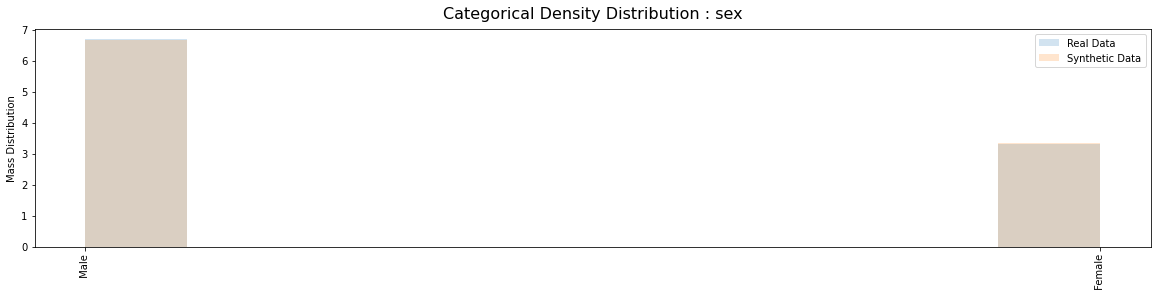

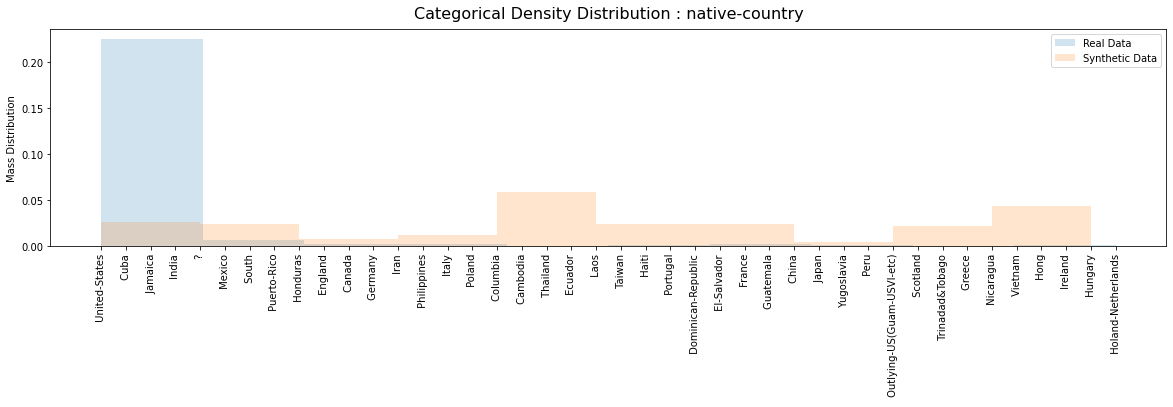

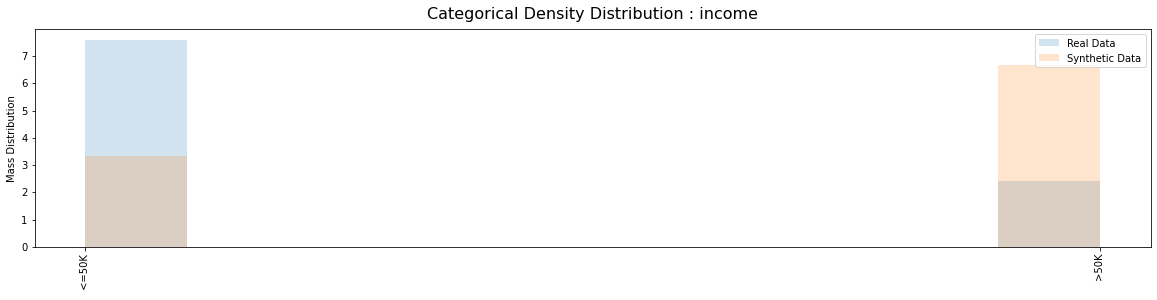

In [48]:
get_full_report(data, sample,discrete_columns,numeric_features)

#### Save model to disk

In [49]:
synth.save('F:/Users/Kaggle/wids/PrivateModelAdvAPI.pth')

#### 

### Fin ###